<a href="https://colab.research.google.com/github/adnannasirsyed/ML_projects/blob/main/Bank_Churn_NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

### Project Structure:
1. Introduction

2. Problem definition & objectives

3. Data Exploration (EDA)
  * Data Overview
  * Univariate Analysis
  * Bivariate Analysis

4. Data Preprocessing

  * Missing values
  * Outliers
  * Feature Engineering
  * Drop features which has no pattern information
  * Train-Validation-Test split
  * Dummy variable creation
  * Data Normalization
  * Categorical Encoding  

5. Model Building

  * Model Evaluation Criteria
  * Optimal Output Threshold using ROC-AUC Curves for each model
  * Nueral Network with SGD Optimizer
  * Nueral Network with Adam Optimizer
  * Nueral Network with SMOTE + SGD Optimizer
  * Nueral Network with SMOTE + Adam Optimizer
  * Nueral Network with SMOTE + Adam Optimizer with Dropout

6. Model Evaluation
  * Metrics and performance analysis using optimal threshold  
  * Final Model Selection

7. Conclusion & Recommendations
  * Final insights for business decision-making

## Importing necessary libraries

In [ ]:
#Installing the libraries with the specified version.
!pip install tensorflow scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy pandas imbalanced-learn==0.10.1 -q --user

 --no-warn-script-location

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently ta

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import time

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [ ]:
# mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bankChurn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UT_Austin_AI_ML/Introduction_to_NeuralNetworks/Project_04_Bank_Churn/bank-1.csv')

In [ ]:
# copying data to another varaible to avoid any changes to original data
data = bankChurn.copy()

## Data Overview

In [ ]:
# Check the top five records of the data
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

### Checking the shape of the dataset

In [ ]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 10000 rows and 14 columns.


### Checking 10 random rows of the dataset

In [ ]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

RowNumber  CustomerId         Surname  CreditScore Geography  Gender  \
9953       9954    15655952           Burke          550    France    Male   
3850       3851    15775293      Stephenson          680    France    Male   
4962       4963    15665088          Gordon          531    France  Female   
3886       3887    15720941            Tien          710   Germany    Male   
5437       5438    15733476        Gonzalez          543   Germany    Male   
8517       8518    15671800        Robinson          688    France    Male   
2041       2042    15709846             Yeh          840    France  Female   
1989       1990    15622454         Zaitsev          695     Spain    Male   
1933       1934    15815560           Bogle          666   Germany    Male   
9984       9985    15696175  Echezonachukwu          602   Germany    Male   

      Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9953   47       2       0.00              2          1               1   
3850   34       3  143292.95              1          1               0   
4962   42       2       0.00              2          0               1   
3886   34       8  147833.30              2          0               1   
5437   30       6   73481.05              1          1               1   
8517   20       8  137624.40              2          1               1   
2041   39       1   94968.97              1          1               0   
1989   28       0   96020.86              1          1               1   
1933   74       7  105102.50              1          1               1   
9984   35       7   90602.42              2          1               1   

      EstimatedSalary  Exited  
9953         97057.28       0  
3850         66526.01       0  
4962         90537.47       0  
3886          1561.58       0  
5437        176692.65       0  
8517        197582.79       0  
2041         84487.62       0  
1989         57992.49       0  
1933         46172.47       0  
9984         51695.41       0

In [ ]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

In [ ]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Observations**
* There are no missing values
* There are two categorical features Geography and Gender
* RowNumber, CustomerId and Surname are the features that have too many unique values and may not contribute towards determining any pattern


### Checking for duplicate values

In [ ]:
# checking for duplicate values
df.duplicated().sum()

np.int64(0)

In [ ]:
df[df.duplicated(keep=False) == True]

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

**Observations**
*  There are no duplicate values



### Checking for missing values

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Observations:**
* Confirmed there are no missing values

**Insights:**
* The dataset has 10,000 rows and 14 columns (before dropping).
* Columns:
    * Numerical: CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary.
    * Categorical: Geography, Gender, HasCrCard, IsActiveMember, Exited.
* Identifier Features: RowNumber, CustomerId, Surname (to be dropped).
* No missing values are present, simplifying preprocessing.
* RowNumber, CustomerId, and Surname have high unique values (10,000, 10,000, and 2,932, respectively) and are unlikely to provide predictive power. These will be dropped.
* Exited (target) is imbalanced: aprox 20% churned (2,037) vs. aprox 80% not churned (7,963).

## Dropping columns that are not useful for modeling

In [ ]:
# Dropping columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

* RowNumber, CustomerId and Surname features were dropped.

## Modified Problem Statement

* The goal is to build a Neural Network Classifier that predicts whether a customer will leave the bank (i.e., churn) in the next 6 months. The target variable is Exited.

## Exploratory Data Analysis

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**Let's check the info of the data**

In [ ]:
# Let's check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### **Summary Statistics**

In [ ]:
# checking shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 10000 rows and 11 columns.


In [ ]:
# Let's check the summary statistics of the data
df.describe().T

count           mean           std     min       25%  \
CreditScore      10000.0     650.528800     96.653299  350.00    584.00   
Age              10000.0      38.921800     10.487806   18.00     32.00   
Tenure           10000.0       5.012800      2.892174    0.00      3.00   
Balance          10000.0   76485.889288  62397.405202    0.00      0.00   
NumOfProducts    10000.0       1.530200      0.581654    1.00      1.00   
HasCrCard        10000.0       0.705500      0.455840    0.00      0.00   
IsActiveMember   10000.0       0.515100      0.499797    0.00      0.00   
EstimatedSalary  10000.0  100090.239881  57510.492818   11.58  51002.11   
Exited           10000.0       0.203700      0.402769    0.00      0.00   

                        50%          75%        max  
CreditScore         652.000     718.0000     850.00  
Age                  37.000      44.0000      92.00  
Tenure                5.000       7.0000      10.00  
Balance           97198.540  127644.2400  250898.09  
NumOfProducts         1.000       2.0000       4.00  
HasCrCard             1.000       1.0000       1.00  
IsActiveMember        1.000       1.0000       1.00  
EstimatedSalary  100193.915  149388.2475  199992.48  
Exited                0.000       0.0000       1.00

**Observations:**
* No missing values are present.
* Columns like RowNumber, CustomerId, and Surname have very high uniqueness and do not contribute to the learning process and are dropped.
* Geography and Gender are categorical variables.
* Target variable Exited has 2 classes: 0 (not churned), 1 (churned).

## Converting "objects" to "category" reduces the data space required to store the dataframe

In [ ]:
cols = df.select_dtypes(['object'])
cols.columns

Index(['Geography', 'Gender'], dtype='object')

In [ ]:
for i in cols.columns:
    df[i] = df[i].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


Lets determine unique value ranges

In [ ]:
unique_Geography = df['Geography'].unique()
print(unique_Geography)

['France', 'Spain', 'Germany']
Categories (3, object): ['France', 'Germany', 'Spain']


In [ ]:
unique_Gender = df['Gender'].unique()
print(unique_Gender)

['Female', 'Male']
Categories (2, object): ['Female', 'Male']


**Observations:**

* There are three unique categories in Geography: France, Spain and Germany.

### **Let's visualize the dataset to see some patterns**

# Univariate Analysis

## Univariate Analysis – Numerical **Features**

### Distribution of Churn

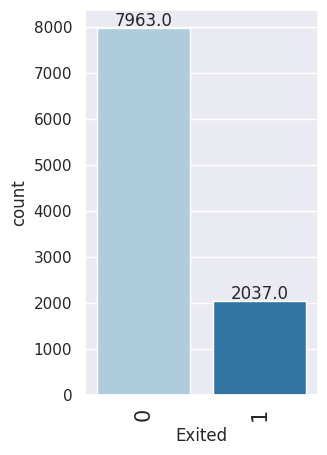

In [ ]:
labeled_barplot(df, "Exited")

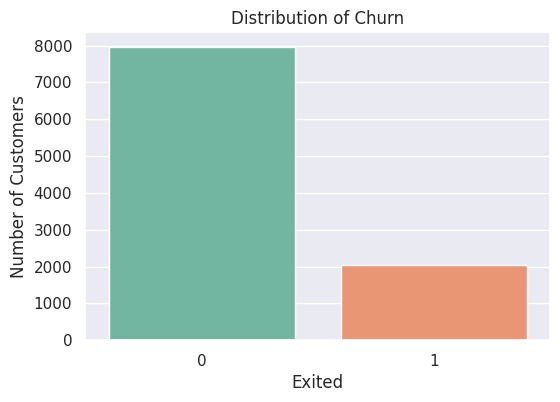

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

In [ ]:
# Plot the distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df, palette='Set2')
plt.title('Distribution of Churn')
plt.xlabel('Exited')
plt.ylabel('Number of Customers')
plt.show()

# Show the percentage distribution
churn_distribution = df['Exited'].value_counts(normalize=True) * 100
churn_distribution

* Exited (Target Variable):
    * Class imbalance is visible.
    * Majority (around 80%) of customers did not churn (Exited = 0).
    * Minority (around 20%) churned (Exited = 1).
    * The overall churn rate is approximately 20.4%, indicating that about one in five customers left the bank within six months.

### Distribution of Credit Score

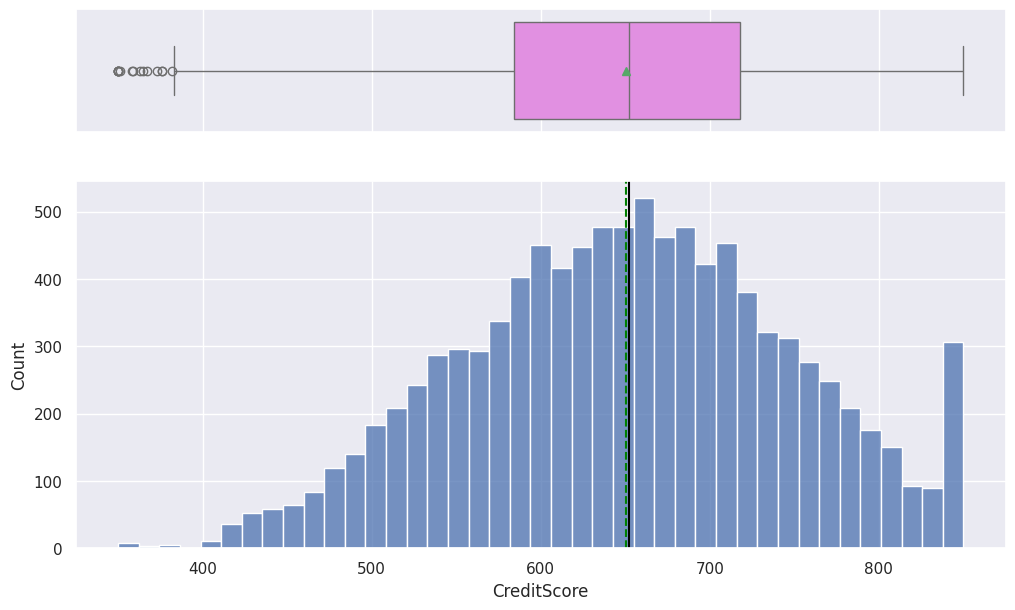

In [ ]:
histogram_boxplot(df, "CreditScore")

### Distribution of Age

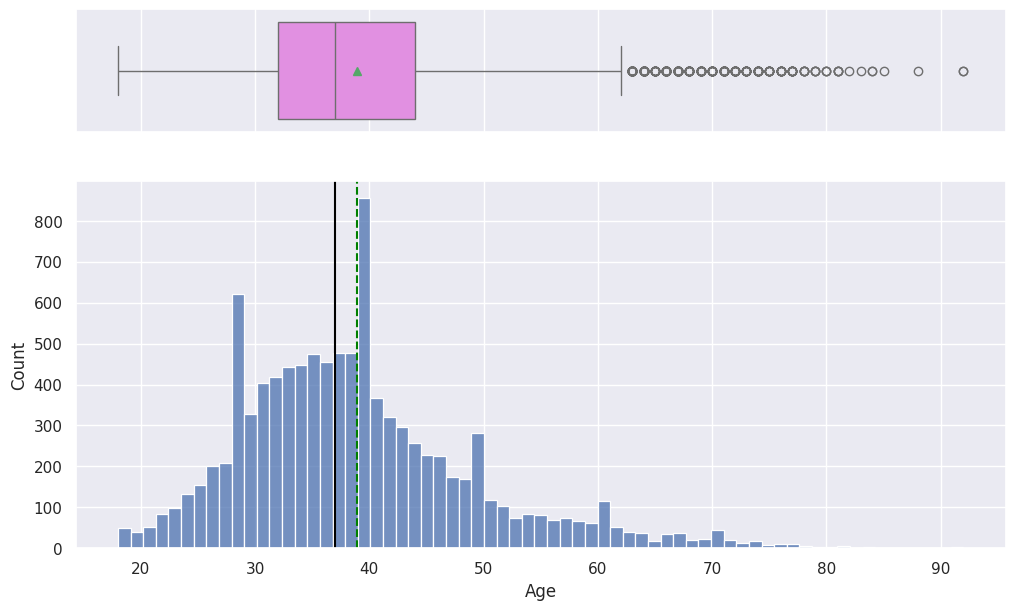

In [ ]:
histogram_boxplot(df, "Age")

### Distribution of Tenure

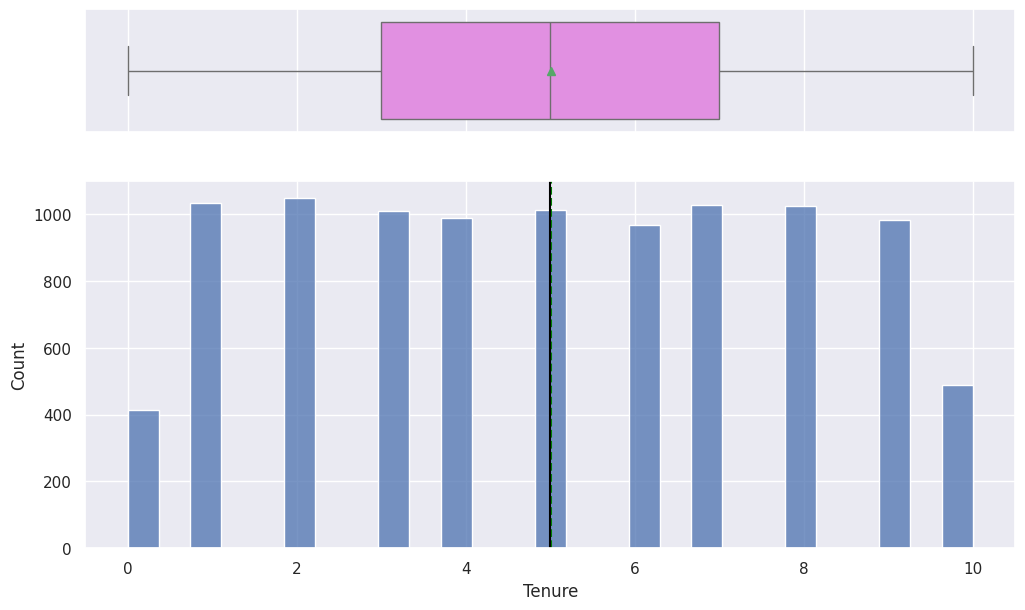

In [ ]:
histogram_boxplot(df, "Tenure")

Distribution of Balance

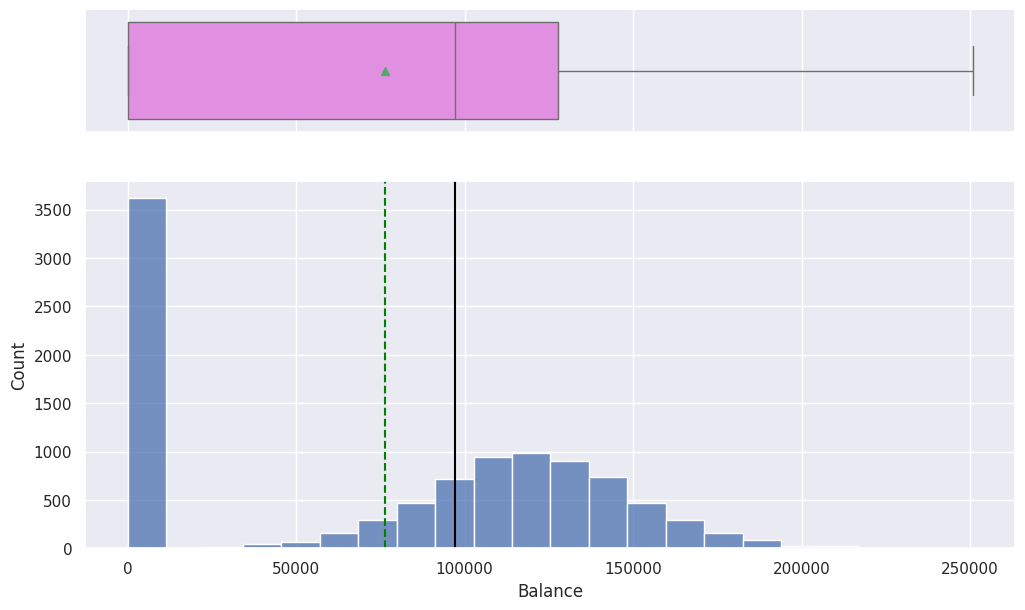

In [ ]:
histogram_boxplot(df, "Balance")

### Distribution of Number of Products used by Customers

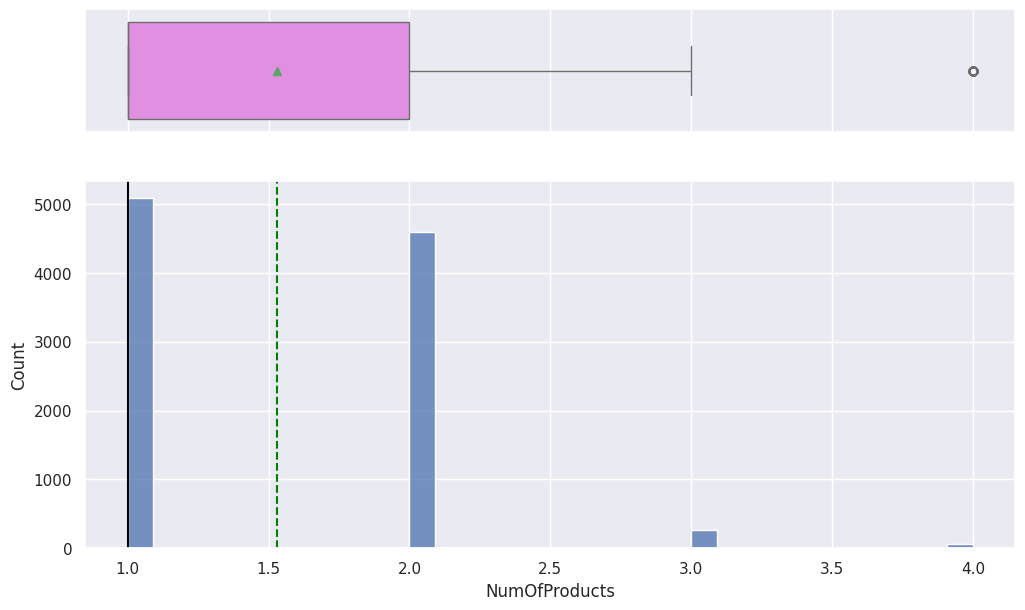

In [ ]:
histogram_boxplot(df, "NumOfProducts")

### Distribution of Estimated Salaries

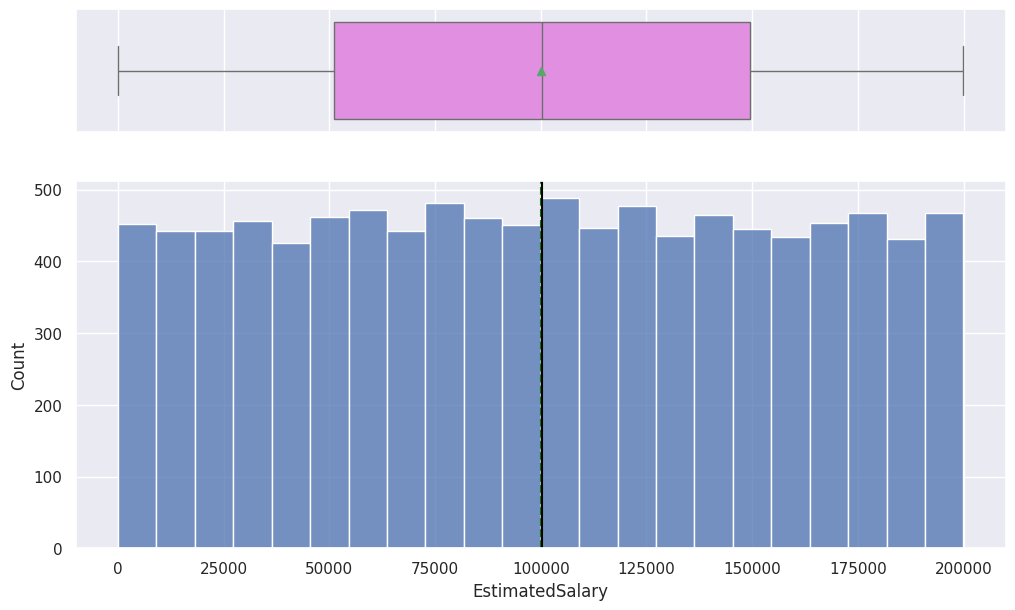

In [ ]:
histogram_boxplot(df, "EstimatedSalary")

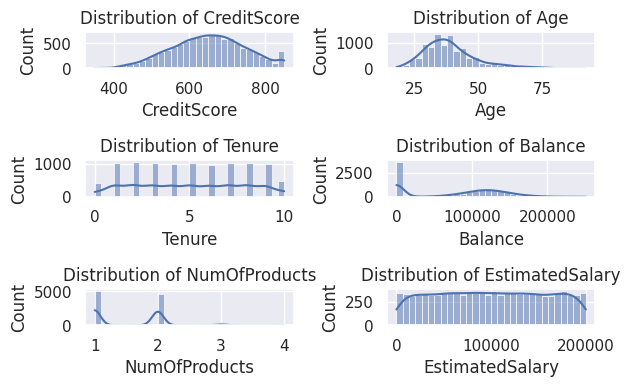

In [ ]:
# Numerical Features Distribution
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for i, feature in enumerate(numerical_features):
    plt.subplot(4, 2, i + 1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}', fontsize=12)

plt.tight_layout()
plt.show()

**Observations:**

* CreditScore: Appears approximately normal, slight left skew.
* Age: Right-skewed, with a peak in the 30s–40s range.
* Tenure: Uniform-like distribution—indicating tenure is well-distributed across 0–10 years.
* Balance: Many customers have zero balance; others are spread across a wide range.
* NumOfProducts: Most customers use 1 or 2 products.
* EstimatedSalary: Fairly uniformly distributed.

## Univariate Analysis – Categorical **Features**

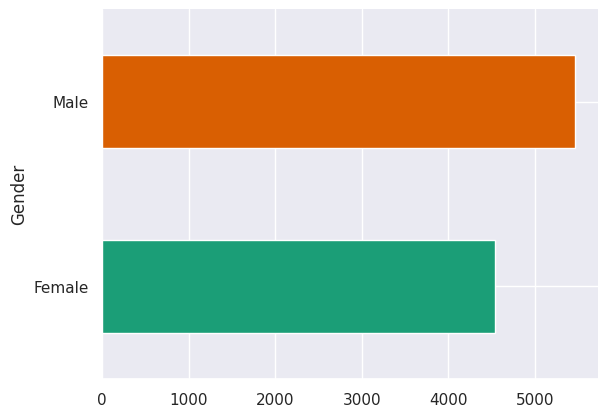

In [ ]:
# @title Gender

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

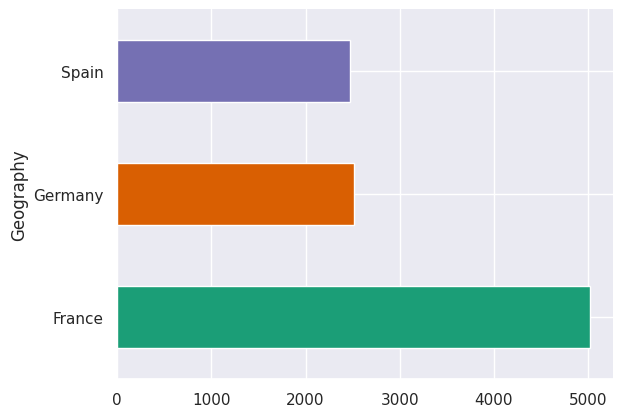

In [ ]:
# @title Geography

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Geography').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Number of Counts for "Has Credit Card" and "Is Active Member"

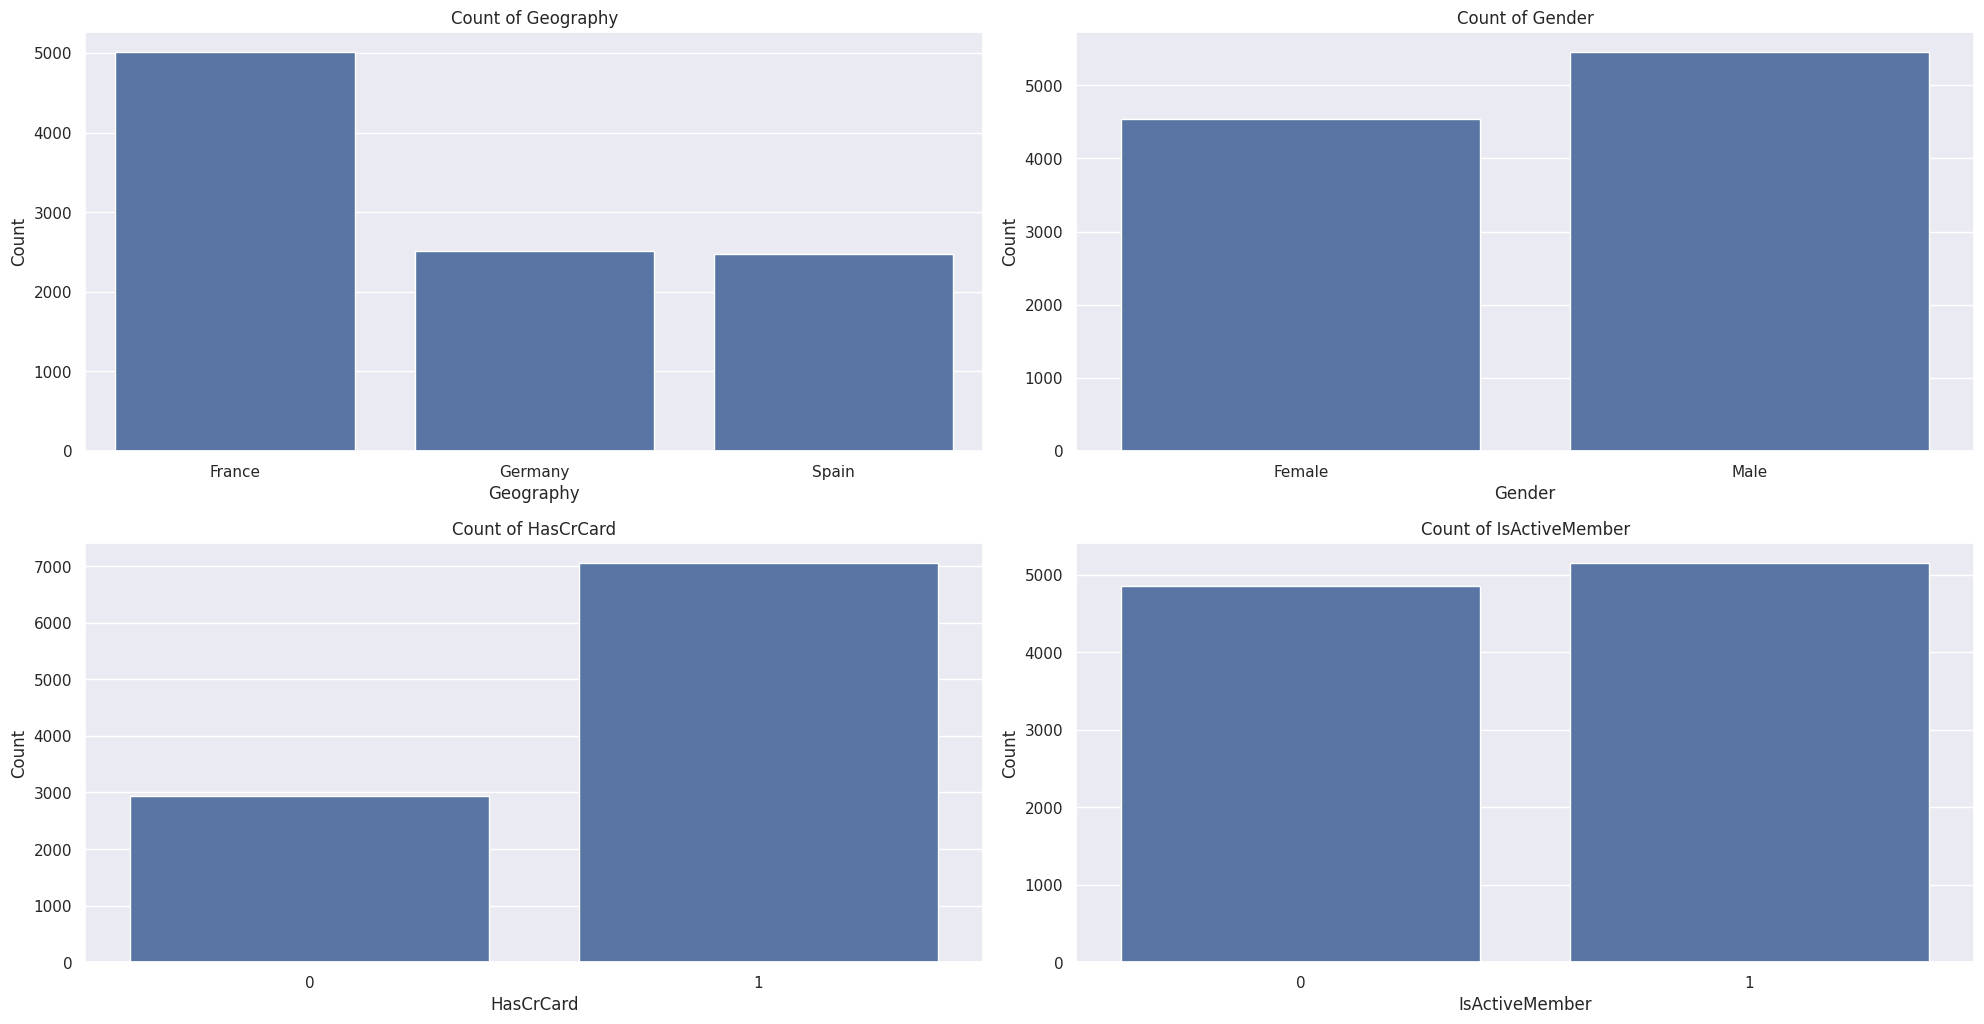

In [ ]:
# Set up plots for categorical variables
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

plt.figure(figsize=(20, 15))

for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=df[feature])
    plt.title(f'Count of {feature}', fontsize=12)
    plt.xlabel(feature)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

**Observations:**
* Geography: Most customers are from France, followed by Spain and Germany.
* Gender: Fairly balanced between Male and Female.
* HasCrCard: Majority of customers hold a credit card.
* IsActiveMember: Slightly more active members than inactive ones.

**Insights**

* Numerical Features:
    * CreditScore: Approximately normal, with a slight left skew. Some outliers below 400.
    * Age: Right-skewed, most customers are 30–50 years old. Outliers above 70.
    * Tenure: Uniformly distributed between 0–10 years.
    * Balance: Bimodal, with a significant peak at 0 (no balance) and another around 100,000–150,000.
    * NumOfProducts: Most customers have 1 or 2 products; very few have 3 or 4.
    * EstimatedSalary: Uniformly distributed, no clear pattern.
* Categorical Features:
    * Geography: France (aprox 50%), Spain (aprox 25%), Germany (aprox 25%).
    * Gender: Slightly more males (aprox 55%) than females (aprox 45%).
    * HasCrCard: aprox 70% have a credit card.
    * IsActiveMember: Roughly balanced (aprox 50% active, 50% inactive).
    * Exited: Imbalanced, with aprox 20% churned, confirming the need for techniques like SMOTE.
* Outlier Consideration:
    * Outliers in CreditScore and Age exist but are realistic (e.g., high-net-worth individuals or elderly customers). Hence, outliers will not be treated to avoid bias, as they reflect real-world banking data.

# Bivariate Analysis

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

## Age with respect to Exited:

Exited     0     1    All
Age                      
All     7963  2037  10000
46       135    91    226
40       343    89    432
43       209    88    297
45       142    87    229
48        88    80    168
47        98    77    175
42       244    77    321
49        72    75    147
44       184    73    257
39       351    72    423
50        63    71    134
41       297    69    366
51        53    66    119
52        38    64    102
38       414    63    477
37       416    62    478
35       417    57    474
36       403    53    456
54        33    51     84
56        20    50     70
55        34    48     82
33       398    44    442
53        34    40     74
57        37    38     75
34       414    33    447
31       371    33    404
60        30    32     62
32       386    32    418
59        32    30     62
58        38    29     67
29       320    28    348
30       303    24    327
28       250    23    273
62        31    21     52
61        32    21     53
63        22

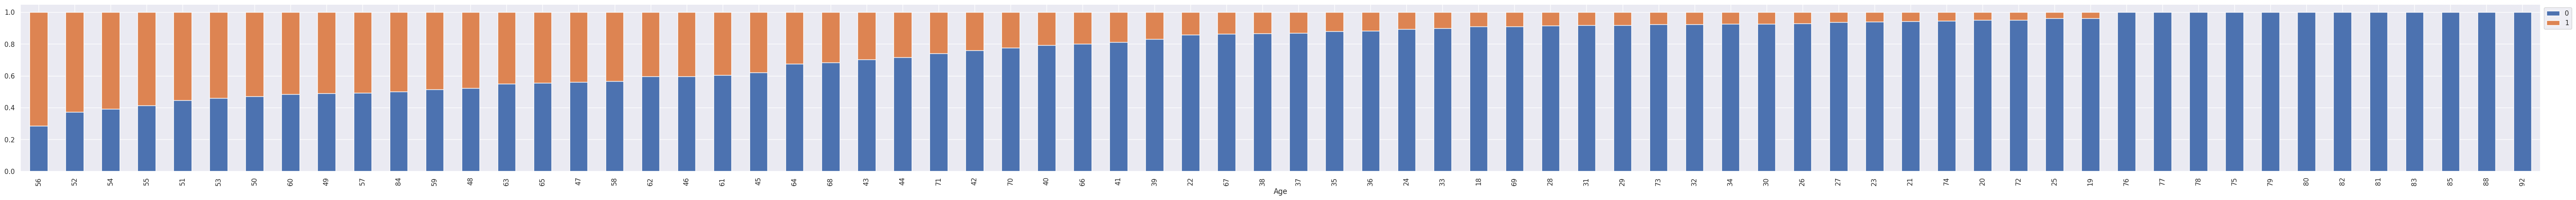

In [ ]:
stacked_barplot(df, "Age", "Exited")

Text(0.5, 1.0, 'Age vs Churn (Exited)')

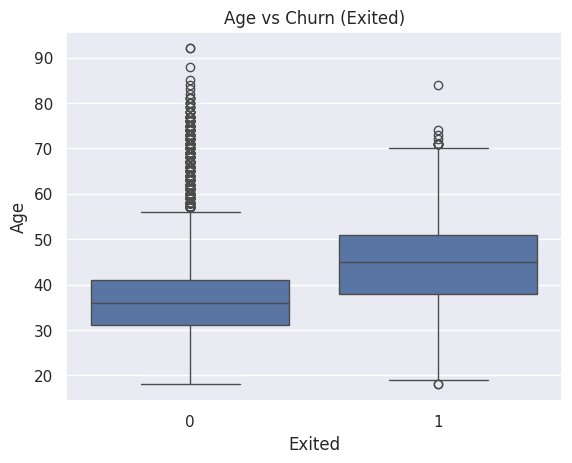

In [ ]:
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Age vs Churn (Exited)')

**Observations:**
* The age range spans from 18 to 92 years, with varying churn rates across age groups.
* Younger customers (e.g., ages 18–25) have relatively low churn rates, often below the overall average of 20.4%. For example:
    * Age 18: 2/22 churned (9.1%)
    * Age 25: 6/154 churned (3.9%)
* Older customers (e.g., ages 70+) also show low churn rates, with some ages (e.g., 75–92) having 0% churn, though sample sizes are small (e.g., only 1–11 customers per age group).
* Middle-aged customers (ages 35–60) exhibit higher churn rates, often above the average. Peak churn occurs around ages 46–56.
      * Age 52: 64/102 churned (62.7%)
      * Age 51: 66/119 churned (55.5%)
      * Age 56: 50/70 churned (71.4%)
      * Age 50: 71/134 churned (53.0%)
      * Age 49: 75/147 churned (51.0%)
* This suggests that customers in their late 40s to mid-50s are the most likely to churn, potentially due to life stage changes (e.g., retirement planning, financial transitions) or dissatisfaction with bank services.

* Churn rates generally increase with age from the early 20s to the early 50s, peaking around ages 51–56.
* After age 56, churn rates decline steadily, with very low or no churn among customers aged 75+.
* The trend suggests a bell-shaped curve for churn propensity, with the highest risk in middle age.

**Recommendation to Bank:**

1. Targeted Retention Campaigns: Focus on customers aged 46–56 with personalized offers, such as better interest rates, loyalty rewards, or enhanced digital banking features.
2. Customer Feedback: Conduct surveys or interviews with customers in high-churn age groups to identify pain points (e.g., fees, service quality, or lack of tailored products).
3. Engage Younger Customers: While churn is low among 18–30-year-olds, proactive engagement (e.g., financial education, rewards programs) could strengthen long-term loyalty.
4. Monitor Small Sample Ages: For ages with small sample sizes (e.g., 80+), track trends over time to confirm low churn patterns.
5. Data Enrichment: Combine age data with other variables (e.g., account type, transaction frequency, income) to build predictive churn models and uncover deeper drivers.
6. The bank could investigate external factors (e.g., competitor offerings, life events) driving churn in high-risk age groups.


## Balance with respect to Exited:

Text(0.5, 1.0, 'Balance vs Churn (Exited)')

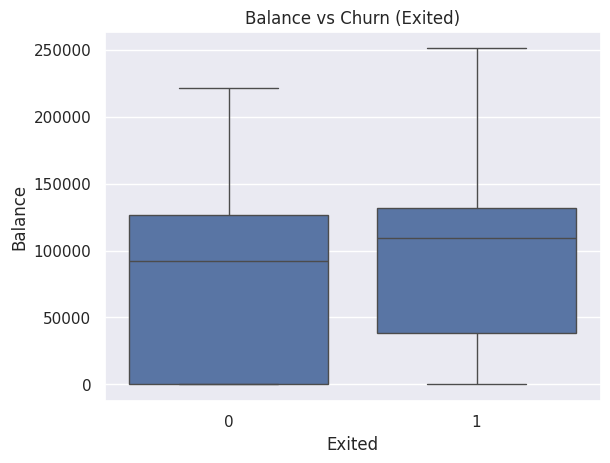

In [ ]:
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance vs Churn (Exited)')

**Observations:**
* Churned customers have higher balances (median aprox 100,000 vs. aprox 50,000), suggesting dissatisfaction among high-balance customers.

## NumOfProducts with respect to Exited:

Text(0.5, 1.0, 'NumOfProducts vs Churn (Exited)')

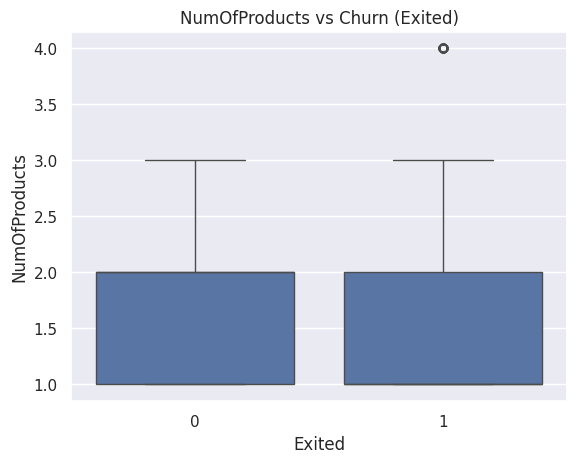

In [ ]:
sns.boxplot(x='Exited', y='NumOfProducts', data=df)
plt.title('NumOfProducts vs Churn (Exited)')

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


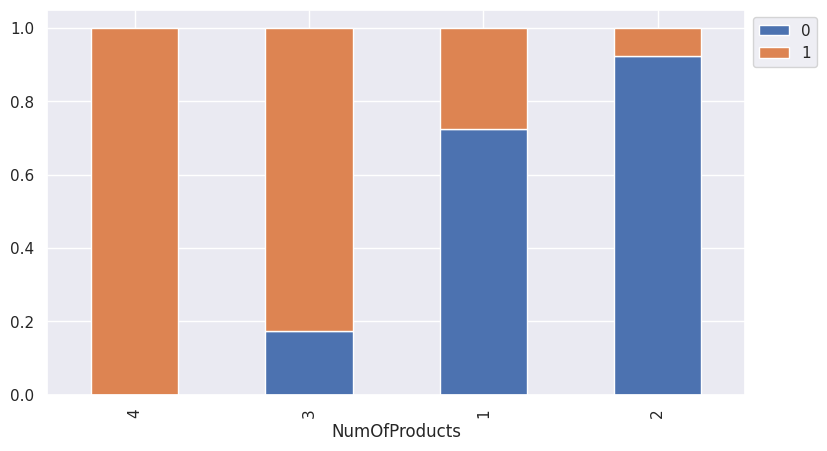

In [ ]:
stacked_barplot(df, "NumOfProducts", "Exited")

## CreditScore, Tenure, EstimatedSalary with respect to Exited:

Text(0.5, 1.0, 'CreditScore vs Churn (Exited)')

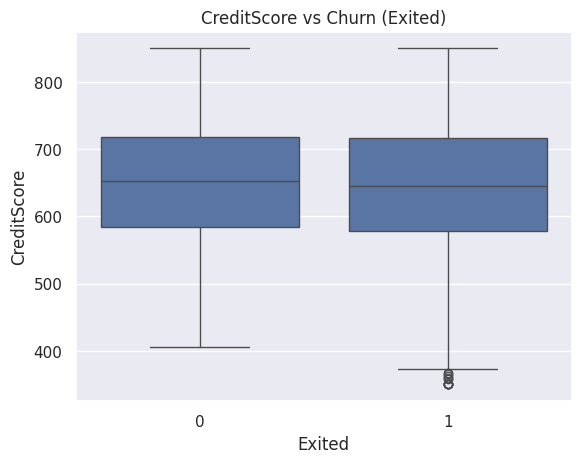

In [ ]:
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('CreditScore vs Churn (Exited)')

Exited          0     1    All
CreditScore                   
All          7963  2037  10000
850           190    43    233
651            33    17     50
705            37    16     53
637            32    14     46
...           ...   ...    ...
830             2     0      2
801             7     0      7
837             8     0      8
810             6     0      6
848             5     0      5

[461 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


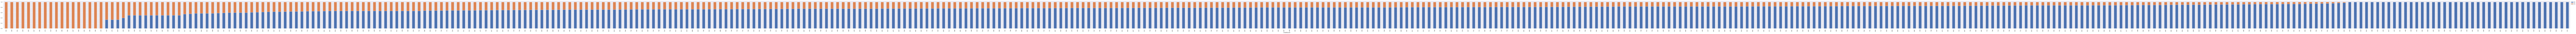

In [ ]:
stacked_barplot(df, "CreditScore", "Exited")

Text(0.5, 1.0, 'Tenure vs Churn (Exited)')

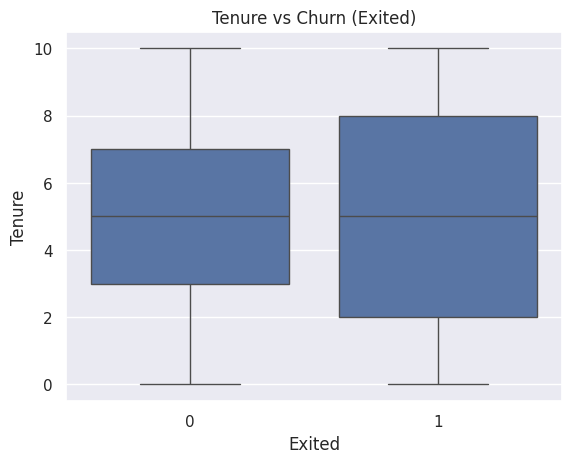

In [ ]:
sns.boxplot(x='Exited', y='Tenure', data=df)
plt.title('Tenure vs Churn (Exited)')

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
9        771   213    984
3        796   213   1009
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


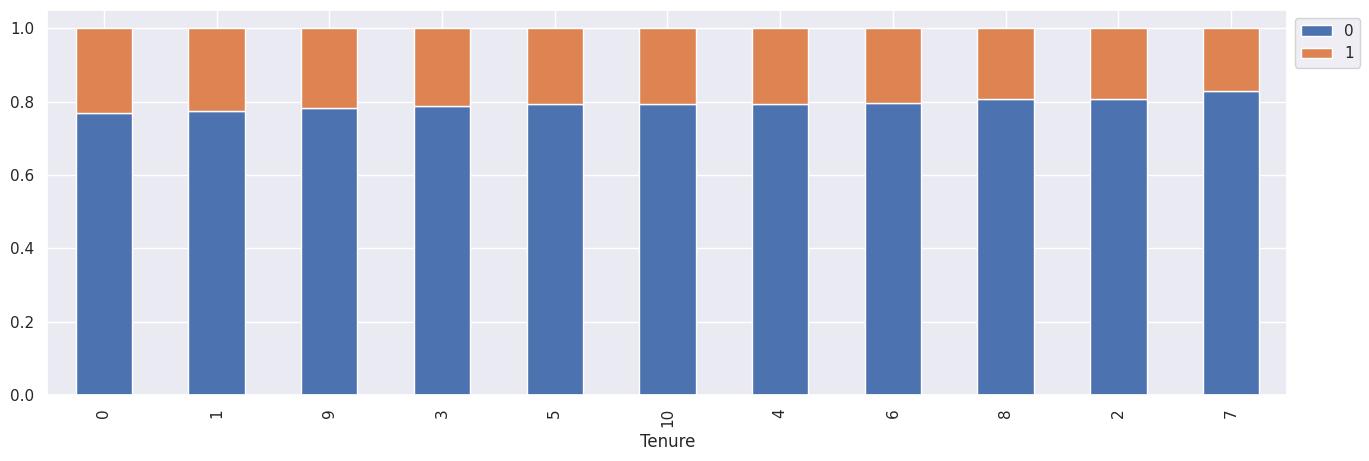

In [ ]:
stacked_barplot(df, "Tenure", "Exited")

Text(0.5, 1.0, 'EstimatedSalary vs Churn (Exited)')

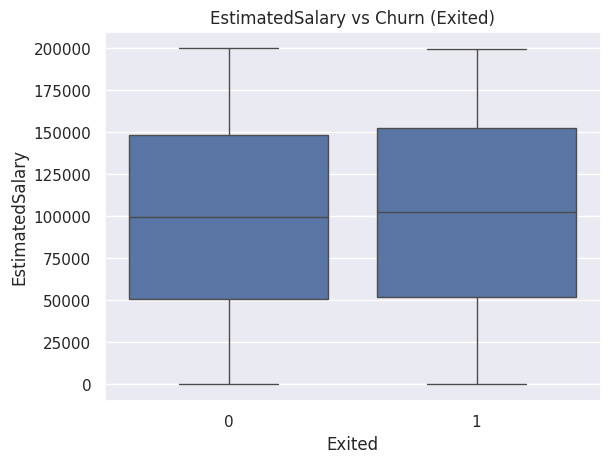

In [ ]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('EstimatedSalary vs Churn (Exited)')

#### Pairplot for relations between numerical variables

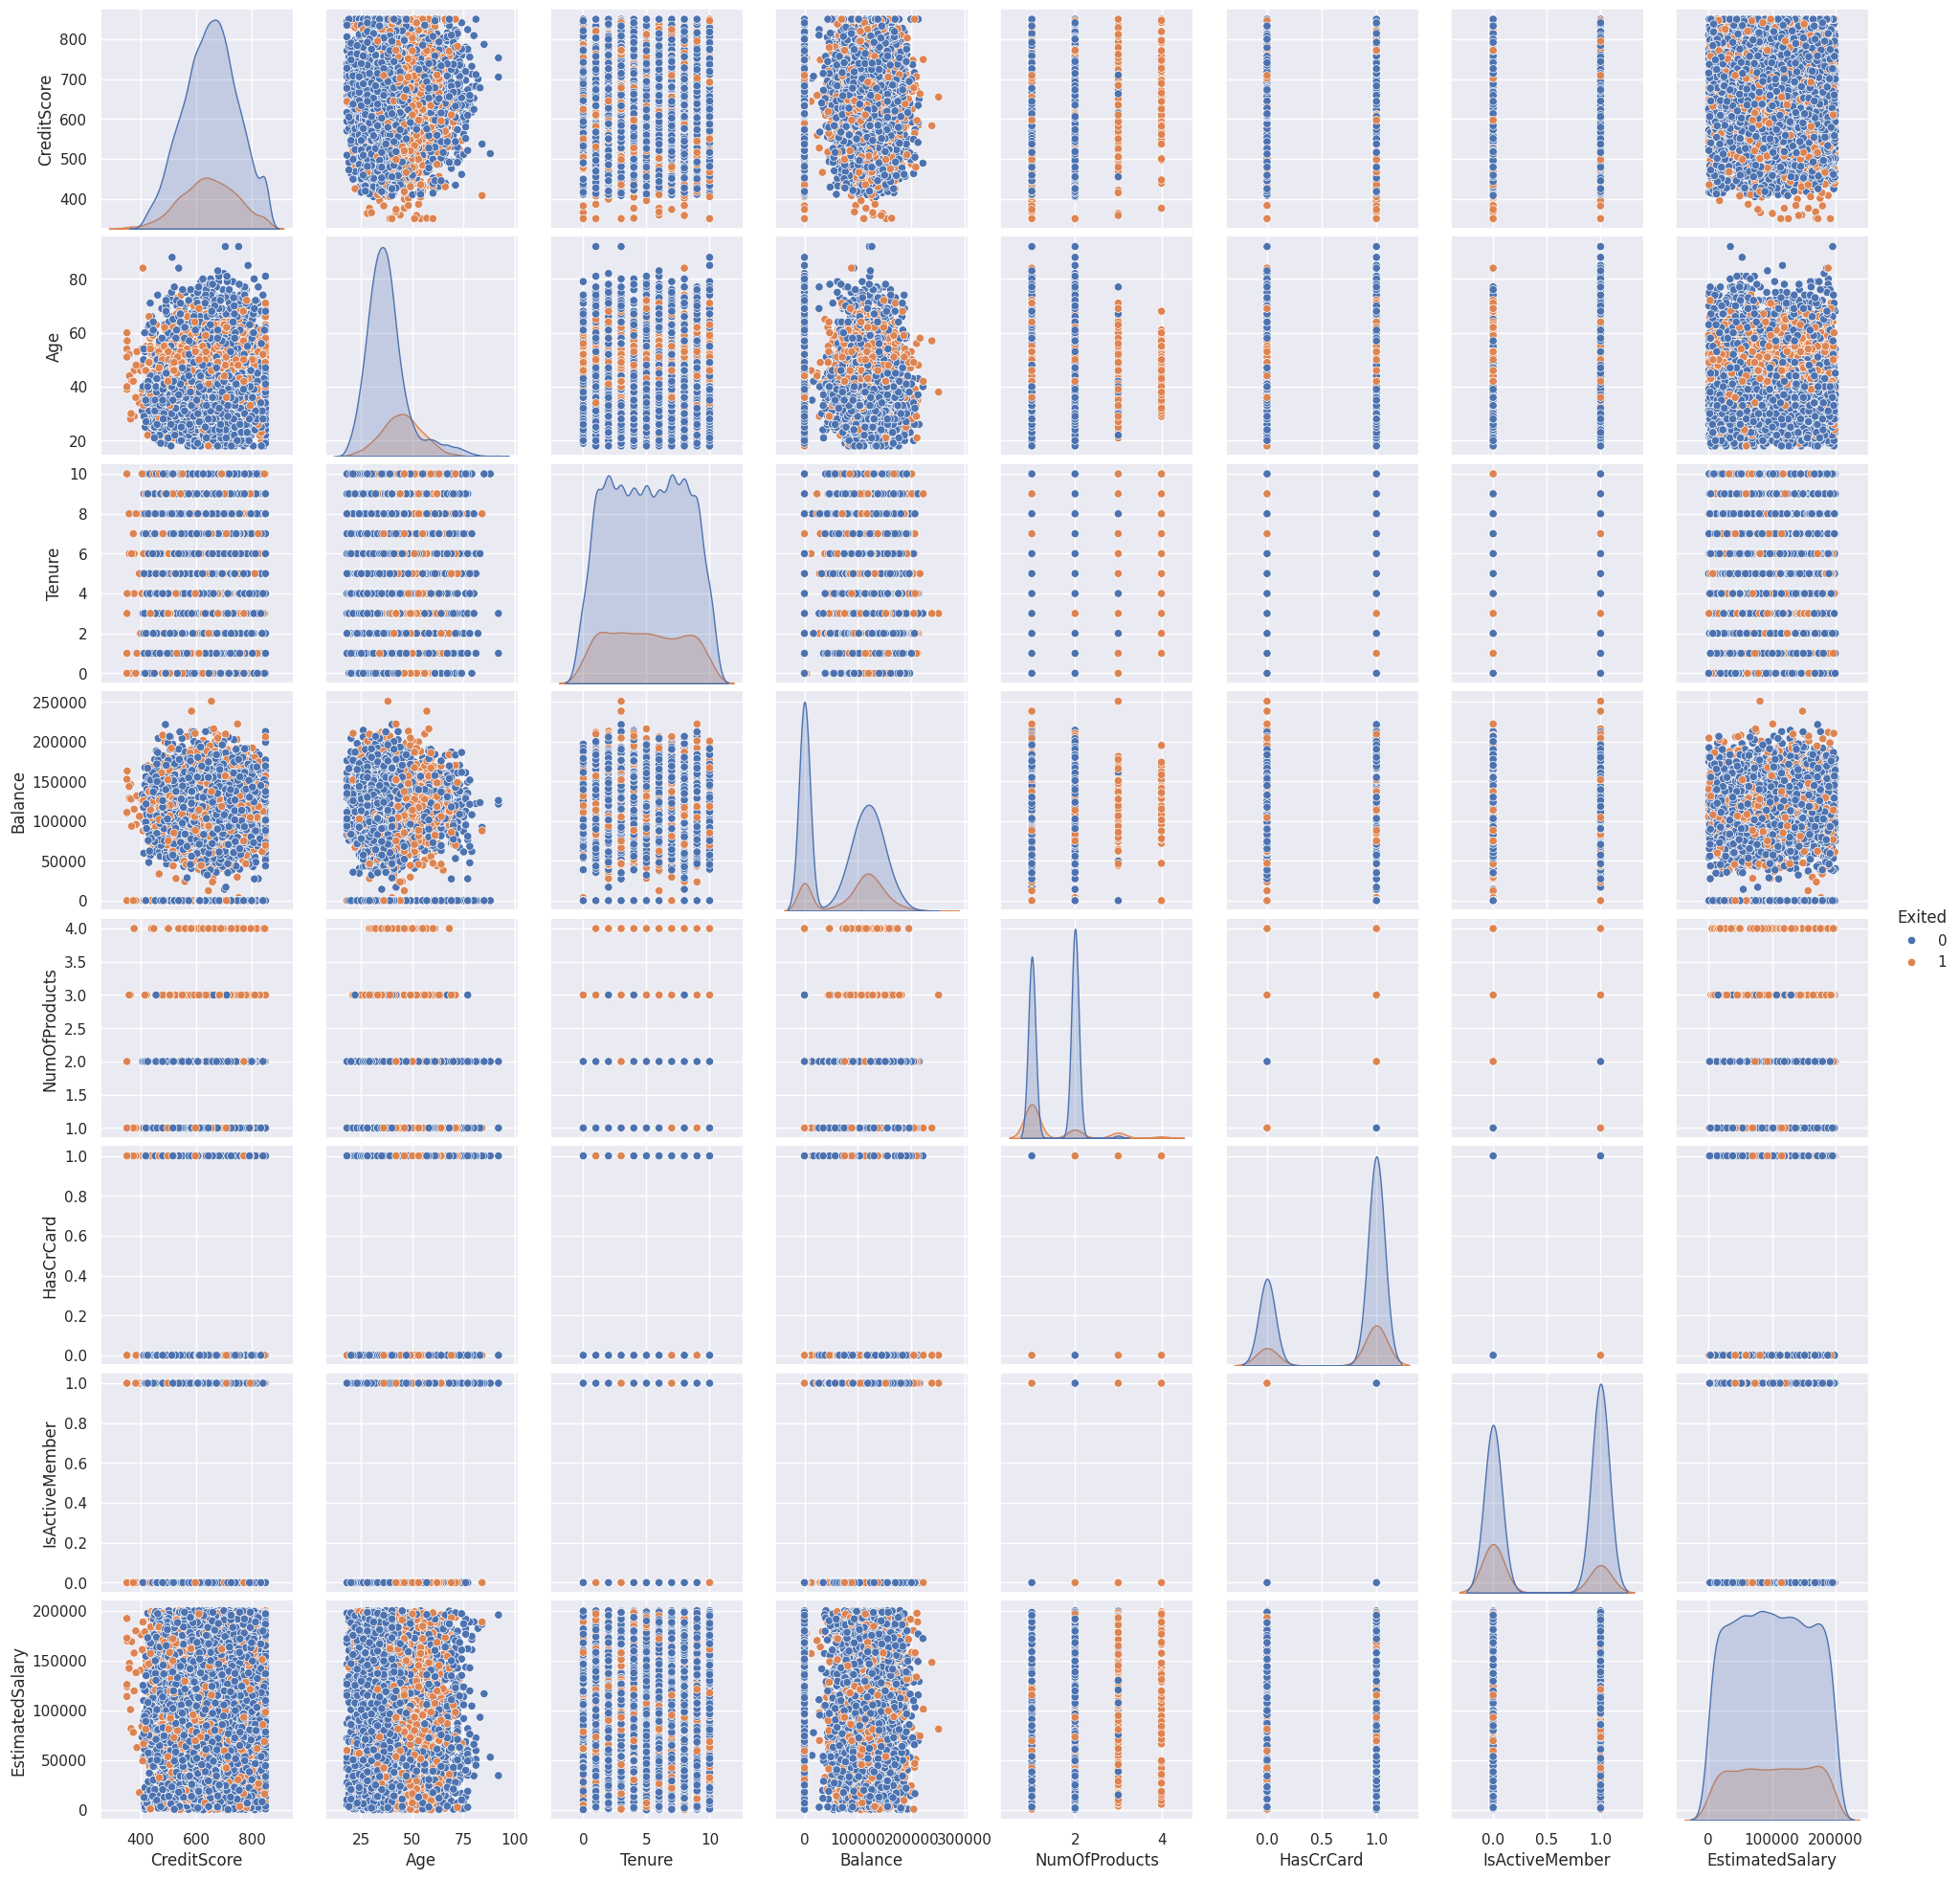

In [ ]:
sns.pairplot(data=df, hue="Exited")
plt.show()

**Observation:**
* No significant corellation exist between the features.

## Geography with respect to Exited:

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


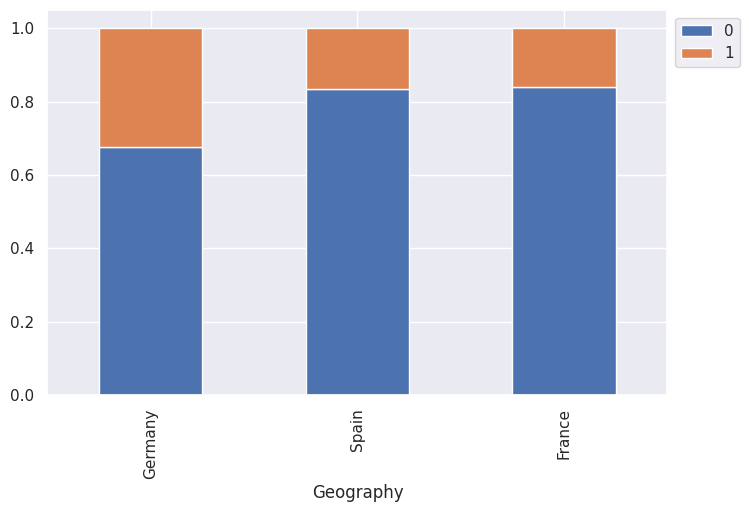

In [ ]:
stacked_barplot(df, "Geography", "Exited")

## Gender with respect to Exited:

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


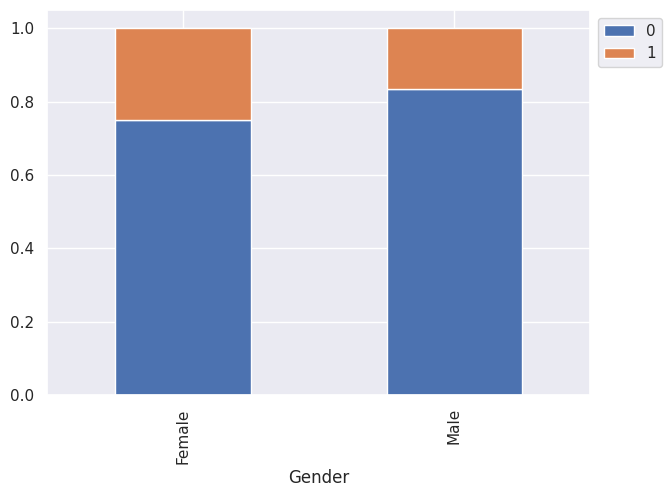

In [ ]:
stacked_barplot(df, "Gender", "Exited")

## IsActiveMember with respect to Exited:

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


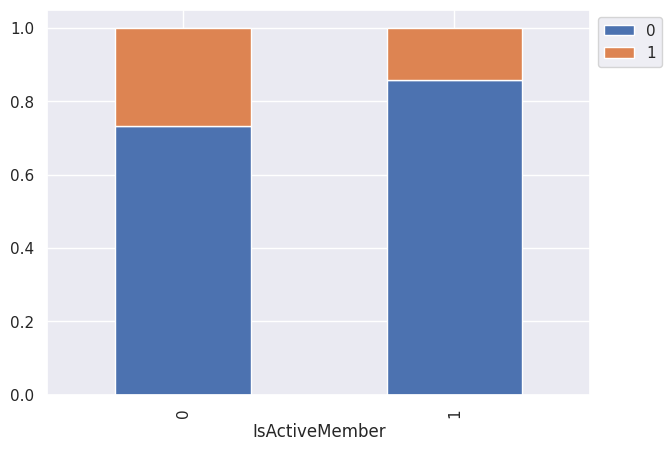

In [ ]:
stacked_barplot(df, "IsActiveMember", "Exited")

## HasCrCard with respect to Exited:

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


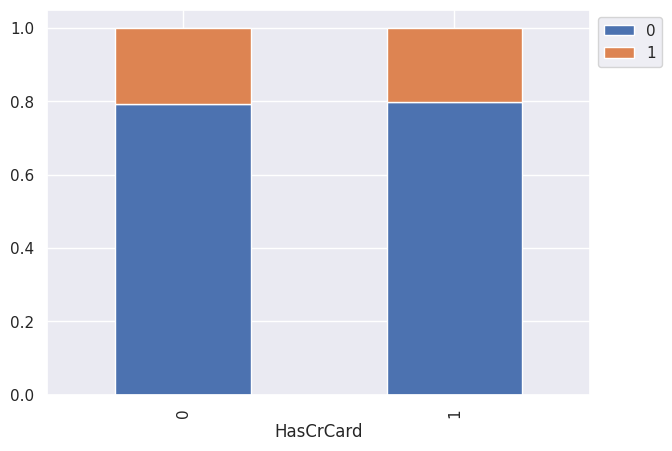

In [ ]:
stacked_barplot(df, "HasCrCard", "Exited")

**Observations:**
* Age vs. Exited: Older customers are more likely to churn.
* Balance vs. Exited: Many churned customers had non-zero balances; customers with zero balance show lower churn.
* Estimated Salary vs. Exited: No strong visual trend with churn.
* NumOfProducts vs. Exited:
    * Customers with 1 product are most likely to churn.
    * Customers with 3 or more products rarely churn.
* Geography vs. Exited:
    * Germany shows significantly higher churn rate.
    * France has the lowest churn rate.
* Gender vs. Exited: Slightly higher churn for females, but not a strong difference.

## Correlation Check



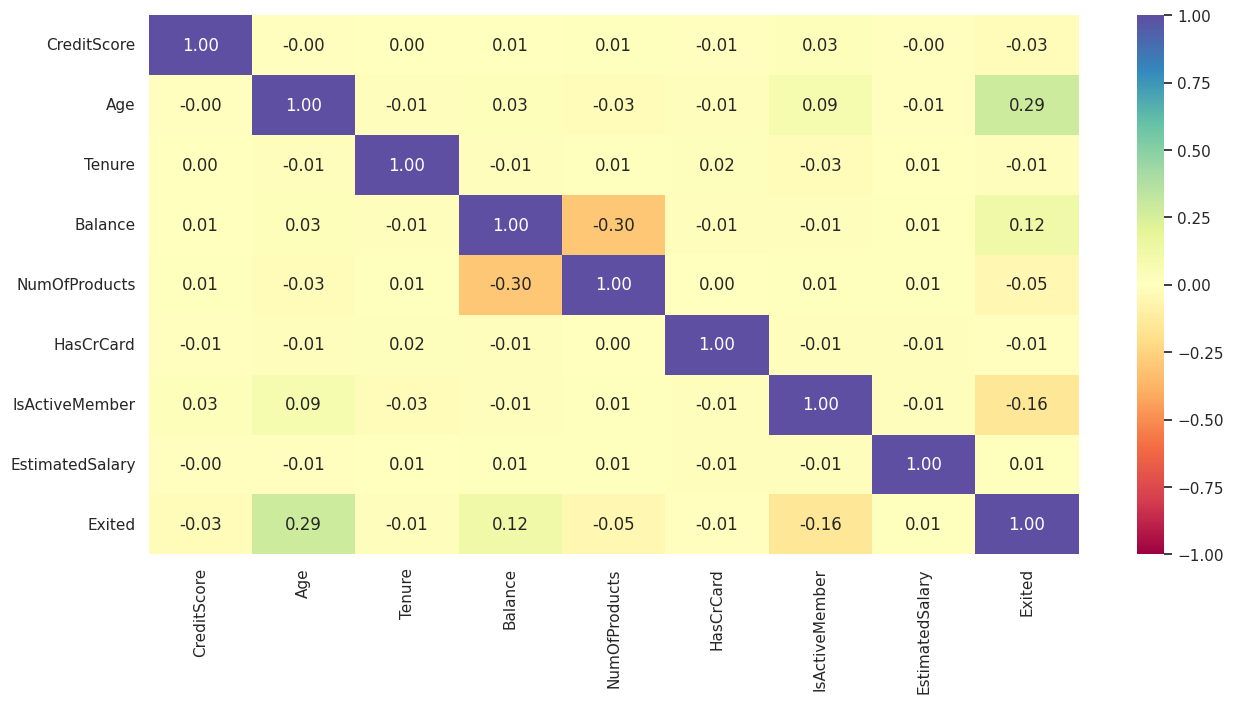

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations:**

* Numerical Features vs. Exited:
    * Age: Churned customers are older (median aprox 45 vs. aprox 35 for non-churned), confirming the age-churn trend from the provided table.
    * Balance: Churned customers have higher balances (median aprox 100,000 vs. aprox 50,000), suggesting dissatisfaction among high-balance customers.
    * NumOfProducts: Churn is higher for customers with 3–4 products or only 1 product, indicating potential issues with product offerings.
    * CreditScore, Tenure, EstimatedSalary: No strong differences between churned and non-churned.
* Categorical Features vs. Exited:
    * Geography: Germany has a higher churn rate (aprox 40%) compared to France (aprox 16%) and Spain (aprox 17%).
    * Gender: Females have a slightly higher churn rate (aprox 25%) than males (aprox 16%).
    * IsActiveMember: Inactive members churn more (aprox 27%) than active members (aprox 14%).
    * HasCrCard: No significant difference in churn based on credit card ownership.
* Correlation Matrix:
    * Age and Exited have a moderate positive correlation (0.29), supporting the finding that older customers are more likely to churn.
    * Balance and Exited have a weak positive correlation (0.12).
    * Other correlations are weak, indicating no multicollinearity issues.

**Key churn drivers:**
* Age, Balance, Geography, Gender, and IsActiveMember.
* The imbalance in Exited suggests SMOTE will be critical for modeling.
* No features show strong correlations with each other, so all can be retained.


# Data Preprocessing

## Missing Values Treatment

**Observations:**
* There were no missing values, hence no treatment is needed.

## Outliers Treatment

**Observation:**
* outliers in CreditScore, Age, and Balance are not treated, as they represent realistic banking scenarios (e.g., high balances or elderly customers).

## Feature Engineering

**Observation:**
* No new features are created, as the existing features are sufficient based on EDA.
* Binning (e.g., Age, Balance) could be explored, but we’ll proceed without it initially to preserve data integrity. Binning can be tested later if model performance is suboptimal.

## Drop Features with No Pattern Information
* Already dropped RowNumber, CustomerId, and Surname in EDA.

## Train-Validation-Test Split

**Objective:**
* Split the data into training (70%), validation (15%), and test (15%) sets, using stratification to maintain class proportions.

In [ ]:
# defining the dependent and independent variables
X = df.drop(['Exited'],axis=1)
y = df['Exited']

In [ ]:
X.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10

In [ ]:
X.tail()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
9995          1               0         96270.64  
9996          1               1        101699.77  
9997          0               1         42085.58  
9998          1               0         92888.52  
9999          1               0         38190.78

In [ ]:
X.shape

(10000, 10)

In [ ]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and train
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# then we split the temporary set into test and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (7000, 10) (7000,)
Validation set shape: (1500, 10) (1500,)
Test set shape: (1500, 10) (1500,)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 7000
Number of rows in validation data = 1500
Number of rows in test data = 1500


In [ ]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_train
Exited
0    0.796286
1    0.203714
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_val
Exited
0    0.796
1    0.204
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_test
Exited
0    0.796667
1    0.203333
Name: proportion, dtype: float64
********************************************************************************


* Training: 7,000 samples, Validation: 1,500, Test: 1,500.
* Stratification ensures 20% churn in each set, preserving the original class distribution.

### Dummy Variable Creation (Categorical Encoding)

* Use one-hot encoding for Geography (no order) and Gender (no order)
* Apply encoding after splitting to avoid data leakage.

In [ ]:
# One Hot Encoding on splited data
#X_train = pd.get_dummies(X_train,drop_first=True) # encoding categorical values
#X_val = pd.get_dummies(X_val,drop_first=True) # encoding categorical values
#X_test = pd.get_dummies(X_test,drop_first=True) # encoding categorical values

# One-hot encoding for categorical variables to avoid Data Leakage
X_train = pd.get_dummies(X_train, columns=['Geography', 'Gender'], drop_first=True)
X_val = pd.get_dummies(X_val, columns=['Geography', 'Gender'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Geography', 'Gender'], drop_first=True)

print("Features after encoding:", X_train.columns.tolist())

Features after encoding: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']


In [ ]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (7000, 11) (7000,)
Validation set shape: (1500, 11) (1500,)
Test set shape: (1500, 11) (1500,)


**Observations:**
    
  * Geography → Geography_Germany, Geography_Spain (France as reference).
  * Gender → Gender_Male (Female as reference).
  * Resulting features: CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Geography_Germany, Geography_Spain, Gender_Male.
  * Total number of features increased to 11.

### Encoding the target variable "Exited"

In [ ]:
# checking the distribution of the target variables on train, validation and test datasets
y_train.value_counts(1)
y_val.value_counts(1)
y_test.value_counts(1)

Exited
0    0.796667
1    0.203333
Name: proportion, dtype: float64

**Observations:**

* Output is already encoded into 1s and 0s
* The target is unbalanced
* Target variable encoding was not performed as it was not necessary. The target variable "Exited" is already in a suitable format for the binary classification task which is directly compatible with the neural network’s **sigmoid** output and binary cross-entropy loss.
* We are not using **Softmax** as there are only two (binary) classes. Therefore no need to specify the number of classes for our models.

### Data Normalization

* Now, we will perform scaling on the numerical variables separately for train, validation and test sets. We will perform **fit** and **transform** on the train data and then only we will perform **transform** on the validation and  test data to avoid data leaking.
* **Objective:** Scale numerical features to [0, 1] for neural network stability.
    * Steps:
      * Use MinMaxScaler on numerical columns.
      * Fit on training data, transform training, validation, and test sets.

In [ ]:
# Define numerical columns
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform training data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
# Transform validation and test data
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Training data after scaling (first 5 rows):")
print(X_train.head())

Training data after scaling (first 5 rows):
      CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
9136        0.490  0.027027     0.4  0.432579       0.000000          1   
6410        0.678  0.608108     0.1  0.000000       0.333333          1   
2607        0.928  0.175676     0.1  0.536584       0.000000          1   
3201        0.744  0.027027     0.6  0.000000       0.333333          1   
3330        0.776  0.000000     0.4  0.000000       0.333333          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
9136               0         0.888722              False            False   
6410               1         0.932662              False             True   
2607               0         0.508512              False            False   
3201               0         0.977467              False            False   
3330               1         0.238961              False            False   

      Gender_Male  
9136         True  
64

In [ ]:
print(X_train.min())
print(X_train.max())

CreditScore            0.0
Age                    0.0
Tenure                 0.0
Balance                0.0
NumOfProducts          0.0
HasCrCard                0
IsActiveMember           0
EstimatedSalary        0.0
Geography_Germany    False
Geography_Spain      False
Gender_Male          False
dtype: object
CreditScore           1.0
Age                   1.0
Tenure                1.0
Balance               1.0
NumOfProducts         1.0
HasCrCard               1
IsActiveMember          1
EstimatedSalary       1.0
Geography_Germany    True
Geography_Spain      True
Gender_Male          True
dtype: object


**Observations:**

* Numerical features are scaled to [0, 1], ensuring neural networks converge faster.
* Categorical features (binary) remain unchanged.
* No data leakage, as the scaler is fitted only on training data.


### Utility functions

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

We'll create a dataframe to store the results from all the models we build

In [ ]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
# columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer","# epochs","batch size","train loss","validation loss","train accuracy","validation accuracy","time (secs)"]

#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization","train loss","validation loss","Loss Diff","train accuracy","validation accuracy","Accuracy Diff", "F1-Score", "time (secs)"]


#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)
results

Empty DataFrame
Columns: [# hidden layers, # neurons - hidden layer, activation function - hidden layer , # epochs, batch size, optimizer, learning rate, momentum, weight initializer, regularization, train loss, validation loss, Loss Diff, train accuracy, validation accuracy, Accuracy Diff, F1-Score, time (secs)]
Index: []

# Model Building

First, let's set the seed for random number generators in NumPy, Python, and TensorFlow to be able to reproduce the same results everytime we run the code.

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

## Model Evaluation Criterion

### Write down the logic for choosing the metric that would be the best metric for this business scenario.

**Rationale:**

* The dataset is imbalanced (aprox 20% churn), so accuracy is not ideal.
* **Primary Metric:** F1-score, as it balances precision and recall, crucial for imbalanced classification.
* **Secondary Metrics:** Precision, Recall, ROC-AUC (to evaluate probability thresholds).
* Why we have choosen F1-score: It penalizes models that favor one class (e.g., predicting all as non-churned) and is suitable for identifying churners (minority class) accurately.

**Let's build a feed forward neural network with 2 hidden layers and the output layer.**
* We chose the following Neural Network Architecture for this Project:
  * Hidden Layers: Two hidden layers with 64 and 32 neurons, respectively, using ReLU activation.
  * Output Layer: One neuron with sigmoid activation for binary classification.
  * Input Shape: X_train.shape[1] (number of features after preprocessing, e.g., 11 features after one-hot encoding and dropping columns).

**Rationale:**
* Heuristics for Number of Neurons:
    * Rule of Thumb: The number of neurons in hidden layers is often chosen to be between the input layer size (number of features) and the output layer size (1 for binary classification).
    * Here, input features are 11, (after preprocessing, e.g., CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Geography_Germany, Geography_Spain, Gender_Male), and Output neurons is 1.
    * Thus, 64 and 32 neurons are reasonable choices, starting larger (64) to capture complex patterns and reducing to 32 to refine features.

* Powers of 2: Using 64 and 32 (powers of 2) is a common practice in neural network design, as it can be computationally efficient for certain hardware optimizations, though not strictly necessary.

* Dataset Size: Your dataset has 10,000 samples (7,000 training, 1,500 validation, 1,500 test). A moderate number of neurons (64 and 32) provides sufficient capacity to model patterns without overfitting, given the dataset’s size and feature complexity.

* The 64 and 32 neurons were chosen as a practical, heuristic-based starting point to balance model capacity and computational efficiency. They are not necessarily “optimal” but are reasonable for the dataset size (aprox 10,000 samples) and feature count (11). Optimal neuron counts would require hyperparameter tuning, which was not prioritized in the project scope.

**Observations:**

## Evaluation Process for each Model:

1. Predict probabilities on the validation set.
2. Compute the ROC-AUC curve to identify the threshold that maximizes the F1-score.
3. Use this optimal threshold to convert probabilities to binary labels.
4. Report F1-score, precision, recall, and ROC-AUC using the optimal threshold.
5. Plot the ROC curve with the optimal threshold marked.
6. Retain the training history plots for loss and accuracy.



# 1. Neural Network with SGD Optimizer

**Objective:** Build a baseline neural network using Stochastic Gradient Descent (SGD).
* Steps:
1. Define a simple neural network with 2 hidden layers Using 128 and 64 neurons for the first two models.
2. Use SGD optimizer.
3. Add optimal threshold calculation.
4. Train and evaluate on validation set.


First, we need to clear the previous model's history from the session. In
Keras, we need special command to clear the model's history otherwise the previous model history remains in the backend.
Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of columns in train data =", X_train.shape[1])

Number of rows in train data = 7000
Number of columns in train data = 11


In [ ]:
# Define model
model_sgd = Sequential([
    Dense(128, activation='relu', kernel_initializer="he_normal", input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_initializer="he_normal"),
    Dense(1, activation='sigmoid', kernel_initializer="he_normal")
])

In [ ]:
# Compile model
learning_rate = 0.001 # Default value
mom = 0.0 # default value
optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=mom) # defining SGD as the optimizer
metrics=['accuracy']
model_sgd.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics, run_eagerly=True) # run_eagerly is set to true for de-bugging using print if needed
model_sgd.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

* batch_size=32:
    * Mini-batch gradient descent: Updates weights after processing 32 samples.
    * Balances noise and computational efficiency.
    * Avoids memory overflow
    * Stochasticity: Helps escape saddle points and local minima.
* batch_size=X_train.shape[0]:
    * Full batch gradient descent: Uses the entire training set for each update.
    * Computes the "true" gradient (no noise) but is rarely used in deep learning.
    * Used for Small Datasets (e.g., < 1K samples).
    * For Convex Problems (e.g., linear regression, SVM).
    * Theoretical Analysis (for exact gradient calculations).

### **Training the model**

In [ ]:
# Time the model
start = time.time()
epochs = 50 # number of Epochs
batch_size = 32 # X_train.shape[0] # Batch size

# Train model
history_sgd = model_sgd.fit(X_train, y_train, validation_data=(X_val, y_val), epochs= epochs, batch_size=batch_size, verbose=0)

end=time.time()

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  473.5812909603119


In [ ]:
# Predict probabilities
y_val_pred_prob = model_sgd.predict(X_val)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


## Optimal Value of Threshold using ROC-AUC Curves

In [ ]:
# Compute ROC curve and optimal threshold
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_prob)
f1_scores = []
for thresh in thresholds:
    y_pred = (y_val_pred_prob > thresh).astype(int)
    f1_scores.append(f1_score(y_val, y_pred))
optimal_idx = np.argmax(f1_scores)
optimal_threshold_sgd = thresholds[optimal_idx]
optimal_f1_sgd = f1_scores[optimal_idx]
optimal_threshold_sgd

np.float32(0.23716897)

In [ ]:
y_val_pred_prob

array([[0.48729348],
       [0.09651541],
       [0.18211886],
       ...,
       [0.10880256],
       [0.19576348],
       [0.29581696]], dtype=float32)

In [ ]:
# Convert probabilities to labels using optimal threshold
y_val_pred = (y_val_pred_prob > optimal_threshold_sgd).astype(int)

In [ ]:
y_val_pred

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
# Metrics
f1_sgd = f1_score(y_val, y_val_pred)
precision_sgd = precision_score(y_val, y_val_pred)
recall_sgd = recall_score(y_val, y_val_pred)
roc_auc_sgd = roc_auc_score(y_val, y_val_pred_prob)

print("SGD Model Performance (Optimal Threshold):")
print(f"Optimal Threshold: {optimal_threshold_sgd:.4f}")
print(f"F1-Score: {f1_sgd:.4f}")
print(f"Precision: {precision_sgd:.4f}")
print(f"Recall: {recall_sgd:.4f}")
print(f"ROC-AUC: {roc_auc_sgd:.4f}")

SGD Model Performance (Optimal Threshold):
Optimal Threshold: 0.2372
F1-Score: 0.4749
Precision: 0.3741
Recall: 0.6503
ROC-AUC: 0.7451


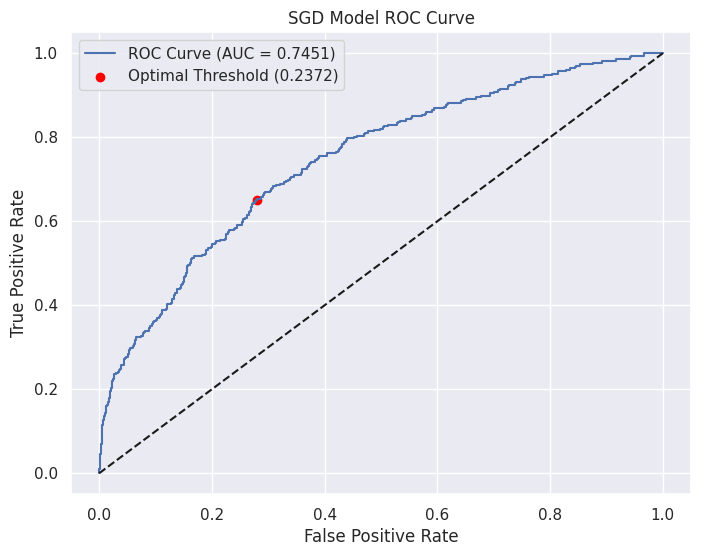

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_sgd:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], c='red', label=f'Optimal Threshold ({optimal_threshold_sgd:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SGD Model ROC Curve')
plt.legend()
plt.show()

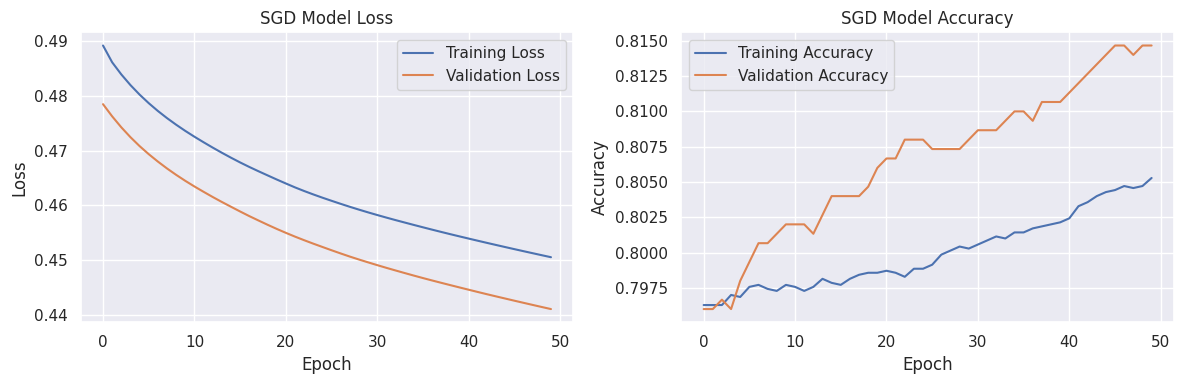

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_sgd.history['loss'], label='Training Loss')
plt.plot(history_sgd.history['val_loss'], label='Validation Loss')
plt.title('SGD Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_sgd.history['accuracy'], label='Training Accuracy')
plt.plot(history_sgd.history['val_accuracy'], label='Validation Accuracy')
plt.title('SGD Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
res_hidden_layers = 2
res_neurons_hidlayer = [128,64]
res_activation_hidlayer = ["relu", "relu"]
res_epochs = epochs
res_batch_size = batch_size
res_optimizer = "SGD"
res_LR_Mom = [learning_rate, mom]
res_weight_initializer = "He" # Using HE to initialize weights (ReLu and Sigmoid)
res_regularization = "-"
res_train_loss = history_sgd.history["loss"][-1]
res_validation_loss = history_sgd.history["val_loss"][-1]
res_Loss_Diff = abs(res_train_loss - res_validation_loss)
res_train_accuracy = history_sgd.history["accuracy"][-1]
res_validation_accuracy = history_sgd.history["val_accuracy"][-1]
res_Accuracy_Diff = abs(res_train_accuracy - res_validation_accuracy)
res_time = round(end-start,2)
res_F1 = f1_sgd

# Convert lists to strings before assigning to the DataFrame
res_neurons_hidlayer_str = str(res_neurons_hidlayer)
res_activation_hidlayer_str = str(res_activation_hidlayer)
res_LR_Mom_str = str(res_LR_Mom)

In [ ]:
results.loc[0] = [res_hidden_layers,res_neurons_hidlayer_str,res_activation_hidlayer_str,res_epochs,res_batch_size,res_optimizer,res_LR_Mom_str,res_weight_initializer,res_regularization,res_train_loss,res_validation_loss,res_Loss_Diff,res_train_accuracy,res_validation_accuracy,res_Accuracy_Diff,res_F1, res_time]

In [ ]:
results

# hidden layers # neurons - hidden layer  \
0                2                [128, 64]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                    ['relu', 'relu']        50          32       SGD   

  learning rate, momentum weight initializer regularization  train loss  \
0            [0.001, 0.0]                 He              -    0.450535   

   validation loss  Loss Diff  train accuracy  validation accuracy  \
0         0.441061   0.009474        0.805286             0.814667   

   Accuracy Diff  F1-Score  time (secs)  
0       0.009381   0.47494       473.58

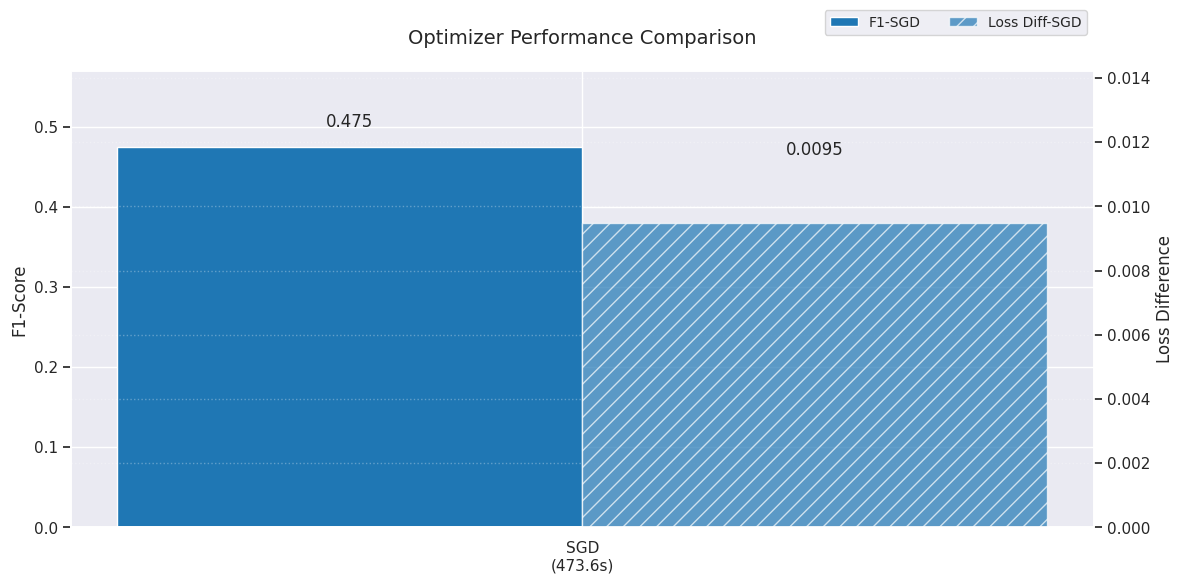

In [ ]:
# Create figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Get data
optimizers = results['optimizer'].unique()
x = np.arange(len(optimizers))
width = 0.35

# Create custom color map
colors = plt.cm.tab10(np.linspace(0, 1, len(optimizers)))

# Plot F1-Scores
f1_bars = ax1.bar(x - width/2, results['F1-Score'], width,
                 color=colors, label=[f'F1-{opt}' for opt in optimizers])

# Plot Loss Differences
ax2 = ax1.twinx()
loss_bars = ax2.bar(x + width/2, results['Loss Diff'], width,
                   color=colors, hatch='//', alpha=0.7,
                   label=[f'Loss Diff-{opt}' for opt in optimizers])

# Configure axes
ax1.set_ylabel('F1-Score', fontsize=12)
ax1.set_ylim(0, max(results['F1-Score']) * 1.2)
ax2.set_ylabel('Loss Difference', fontsize=12)
ax2.set_ylim(0, max(results['Loss Diff']) * 1.5)

# Add time labels
time_labels = [f"{opt}\n({time:.1f}s)"
              for opt, time in zip(optimizers, results['time (secs)'])]
ax1.set_xticks(x)
ax1.set_xticklabels(time_labels, fontsize=11)

# Add value labels
for i, (f1_bar, loss_bar) in enumerate(zip(f1_bars, loss_bars)):
    ax1.text(f1_bar.get_x() + f1_bar.get_width()/2,
            f1_bar.get_height() + 0.02,
            f"{f1_bar.get_height():.3f}",
            ha='center', va='bottom')

    ax2.text(loss_bar.get_x() + loss_bar.get_width()/2,
            loss_bar.get_height() + 0.002,
            f"{loss_bar.get_height():.4f}",
            ha='center', va='bottom')

# Create combined legend
handles = []
handles.extend(f1_bars)
handles.extend(loss_bars)
labels = [f'F1-{opt}' for opt in optimizers] + [f'Loss Diff-{opt}' for opt in optimizers]

ax1.legend(handles, labels, loc='upper right',
          bbox_to_anchor=(1, 1.15), ncol=2, fontsize=10)

plt.title('Optimizer Performance Comparison', pad=20, fontsize=14)
plt.grid(axis='y', linestyle=':', alpha=0.3)
plt.tight_layout()
plt.show()

**Observations:**
* Insights:
    * Performance: F1-score is 43%, with moderate recall and precision due to imbalance.
    * Convergence: SGD converge slowly, leading to suboptimal performance.
    * Overfitting: Validation loss and training losses were almost same, it may have some overfitting.

## Model Performance Improvement

# 2. Neural Network with Adam Optimizer

**Objective:** Improve performance using the Adam optimizer, which adapts learning rates.
* Steps:
1. Define a simple neural network with 2 hidden layers.
2. Use Adam optimizer.
3. Add optimal threshold calculation.
4. Train and evaluate on validation set.


First, we need to clear the previous model's history from the session. In
Keras, we need special command to clear the model's history otherwise the previous model history remains in the backend.
Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Define model
model_adam = Sequential([
    Dense(128, activation='relu', kernel_initializer="he_normal", input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_initializer="he_normal"),
    Dense(1, activation='sigmoid', kernel_initializer="he_normal")
])

In [ ]:
# Compile model
learning_rate = 0.001 # Default value
mom = 0.0 # default value
optimizer = keras.optimizers.Adam(learning_rate=learning_rate) # defining SGD as the optimizer
metrics=['accuracy']
model_adam.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics, run_eagerly=True) # run_eagerly is set to true for de-bugging using print if needed
model_adam.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

### **Training the model**

In [ ]:
# Time the model
start = time.time()
epochs = 50 # number of Epochs
batch_size = 32 # X_train.shape[0] # Batch size

# Train model
history_adam = model_adam.fit(X_train, y_train, validation_data=(X_val, y_val), epochs= epochs, batch_size=batch_size, verbose=0)

end=time.time()

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  906.6700119972229


In [ ]:
# Predict probabilities
y_val_pred_prob = model_adam.predict(X_val)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


## Optimal Value of Threshold using ROC-AUC Curves

In [ ]:
# Compute ROC curve and optimal threshold
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_prob)
f1_scores = []
for thresh in thresholds:
    y_pred = (y_val_pred_prob > thresh).astype(int)
    f1_scores.append(f1_score(y_val, y_pred))
optimal_idx = np.argmax(f1_scores)
optimal_threshold_adam = thresholds[optimal_idx]
optimal_f1_adam = f1_scores[optimal_idx]

In [ ]:
optimal_f1_adam

0.6359143327841845

In [ ]:
# Convert probabilities to labels using optimal threshold
y_val_pred = (y_val_pred_prob > optimal_threshold_sgd).astype(int)

In [ ]:
# Metrics
f1_adam = f1_score(y_val, y_val_pred)
precision_adam = precision_score(y_val, y_val_pred)
recall_adam = recall_score(y_val, y_val_pred)
roc_auc_adam = roc_auc_score(y_val, y_val_pred_prob)

print("Adam Model Performance (Optimal Threshold):")
print(f"Optimal Threshold: {optimal_threshold_adam:.4f}")
print(f"F1-Score: {f1_adam:.4f}")
print(f"Precision: {precision_adam:.4f}")
print(f"Recall: {recall_adam:.4f}")
print(f"ROC-AUC: {roc_auc_adam:.4f}")

Adam Model Performance (Optimal Threshold):
Optimal Threshold: 0.3752
F1-Score: 0.5788
Precision: 0.4953
Recall: 0.6961
ROC-AUC: 0.8596


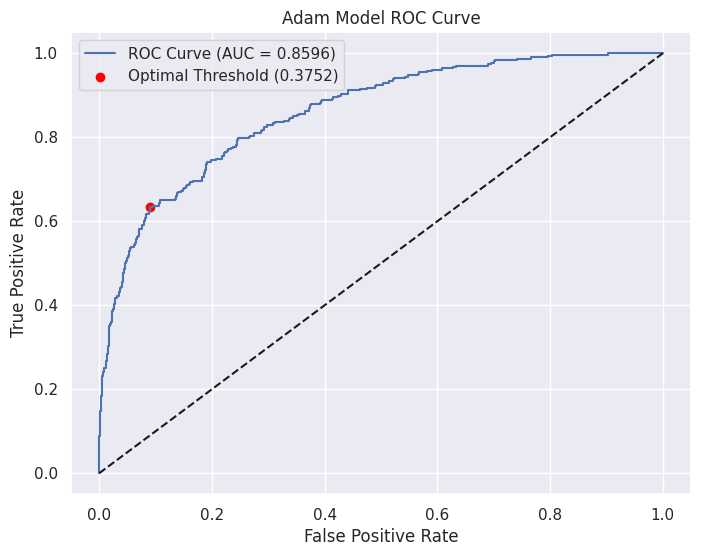

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_adam:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], c='red', label=f'Optimal Threshold ({optimal_threshold_adam:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Adam Model ROC Curve')
plt.legend()
plt.show()

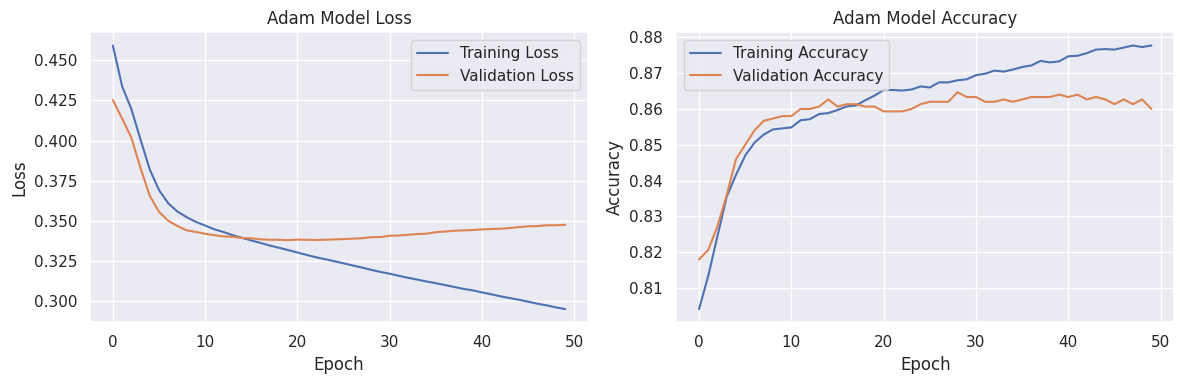

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_adam.history['loss'], label='Training Loss')
plt.plot(history_adam.history['val_loss'], label='Validation Loss')
plt.title('Adam Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_adam.history['accuracy'], label='Training Accuracy')
plt.plot(history_adam.history['val_accuracy'], label='Validation Accuracy')
plt.title('Adam Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
res_hidden_layers = 2
res_neurons_hidlayer = [128,64]
res_activation_hidlayer = ["relu", "relu"]
res_epochs = epochs
res_batch_size = batch_size
res_optimizer = "Adam"
res_LR_Mom = [learning_rate, mom]
res_weight_initializer = "He" # Using HE to initialize weights (ReLu and Sigmoid)
res_regularization = "-"
res_train_loss = history_adam.history["loss"][-1]
res_validation_loss = history_adam.history["val_loss"][-1]
res_Loss_Diff = abs(res_train_loss - res_validation_loss)
res_train_accuracy = history_adam.history["accuracy"][-1]
res_validation_accuracy = history_adam.history["val_accuracy"][-1]
res_Accuracy_Diff = abs(res_train_accuracy - res_validation_accuracy)
res_time = round(end-start,2)
res_F1 = f1_adam

# Convert lists to strings before assigning to the DataFrame
res_neurons_hidlayer_str = str(res_neurons_hidlayer)
res_activation_hidlayer_str = str(res_activation_hidlayer)
res_LR_Mom_str = str(res_LR_Mom)

In [ ]:
results.loc[1] = [res_hidden_layers,res_neurons_hidlayer_str,res_activation_hidlayer_str,res_epochs,res_batch_size,res_optimizer,res_LR_Mom_str,res_weight_initializer,res_regularization,res_train_loss,res_validation_loss,res_Loss_Diff,res_train_accuracy,res_validation_accuracy,res_Accuracy_Diff,res_F1, res_time]

In [ ]:
results

# hidden layers # neurons - hidden layer  \
0                2                [128, 64]   
1                2                [128, 64]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                    ['relu', 'relu']        50          32       SGD   
1                    ['relu', 'relu']        50          32      Adam   

  learning rate, momentum weight initializer regularization  train loss  \
0            [0.001, 0.0]                 He              -    0.450535   
1            [0.001, 0.0]                 He              -    0.295099   

   validation loss  Loss Diff  train accuracy  validation accuracy  \
0         0.441061   0.009474        0.805286             0.814667   
1         0.347550   0.052451        0.877714             0.860000   

   Accuracy Diff  F1-Score  time (secs)  
0       0.009381  0.474940       473.58  
1       0.017714  0.578804       906.67

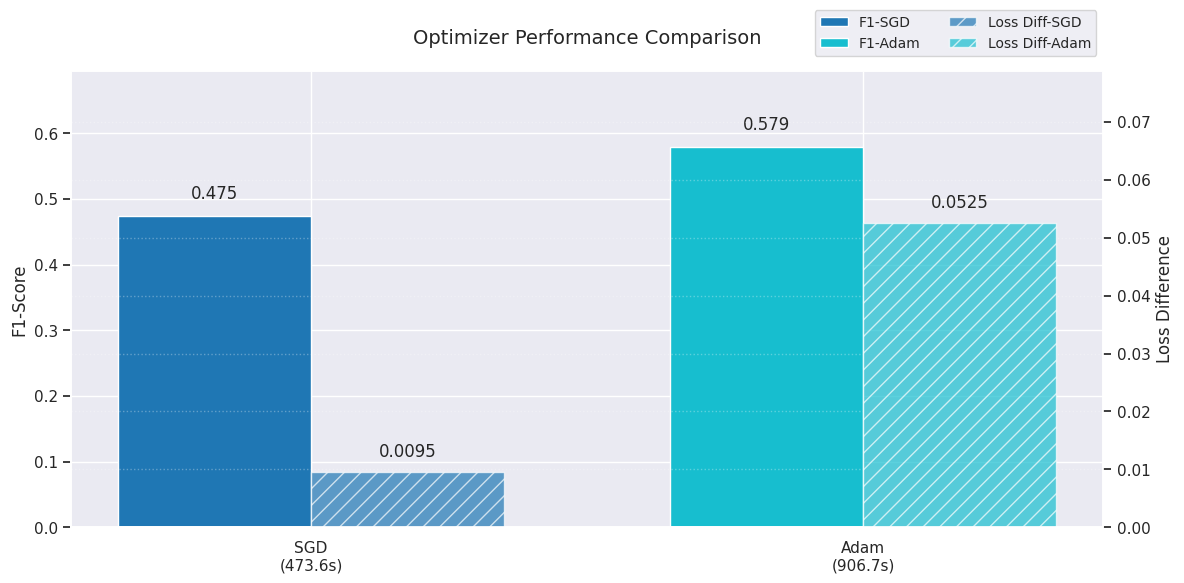

In [ ]:
# Create figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Get data
optimizers = results['optimizer'].unique()
x = np.arange(len(optimizers))
width = 0.35

# Create custom color map
colors = plt.cm.tab10(np.linspace(0, 1, len(optimizers)))

# Plot F1-Scores
f1_bars = ax1.bar(x - width/2, results['F1-Score'], width,
                 color=colors, label=[f'F1-{opt}' for opt in optimizers])

# Plot Loss Differences
ax2 = ax1.twinx()
loss_bars = ax2.bar(x + width/2, results['Loss Diff'], width,
                   color=colors, hatch='//', alpha=0.7,
                   label=[f'Loss Diff-{opt}' for opt in optimizers])

# Configure axes
ax1.set_ylabel('F1-Score', fontsize=12)
ax1.set_ylim(0, max(results['F1-Score']) * 1.2)
ax2.set_ylabel('Loss Difference', fontsize=12)
ax2.set_ylim(0, max(results['Loss Diff']) * 1.5)

# Add time labels
time_labels = [f"{opt}\n({time:.1f}s)"
              for opt, time in zip(optimizers, results['time (secs)'])]
ax1.set_xticks(x)
ax1.set_xticklabels(time_labels, fontsize=11)

# Add value labels
for i, (f1_bar, loss_bar) in enumerate(zip(f1_bars, loss_bars)):
    ax1.text(f1_bar.get_x() + f1_bar.get_width()/2,
            f1_bar.get_height() + 0.02,
            f"{f1_bar.get_height():.3f}",
            ha='center', va='bottom')

    ax2.text(loss_bar.get_x() + loss_bar.get_width()/2,
            loss_bar.get_height() + 0.002,
            f"{loss_bar.get_height():.4f}",
            ha='center', va='bottom')

# Create combined legend
handles = []
handles.extend(f1_bars)
handles.extend(loss_bars)
labels = [f'F1-{opt}' for opt in optimizers] + [f'Loss Diff-{opt}' for opt in optimizers]

ax1.legend(handles, labels, loc='upper right',
          bbox_to_anchor=(1, 1.15), ncol=2, fontsize=10)

plt.title('Optimizer Performance Comparison', pad=20, fontsize=14)
plt.grid(axis='y', linestyle=':', alpha=0.3)
plt.tight_layout()
plt.show()

**Observations:**
* Insights:
    * Performance: Adam outperformed SGD, with F1-score aprox 0.58. We don't see very significant improvement using 128, 64 neuron combination for the hidden layers.
    * Convergence: The computationa time is aprox doubled.
    * Overfitting: The model is overfitting due to a large difference in the training and validation loss.

# 3. Neural Network with Adam Optimizer and Dropout

**Objective:** Improve performance using the Adam optimizer with adapting learning rates with dropout.
* Steps:
1. Define a simple neural network with 2 hidden layers.
2. Use Adam optimizer with dropout 30%.
3. Add optimal threshold calculation.
4. Train and evaluate on validation set.

* We didn't see any significant improvement using 128 and 64 neurons in the hidden layers, now we will use 64 and 32 neurons in our hidden layers and evaluate the performance.


First, we need to clear the previous model's history from the session. In
Keras, we need special command to clear the model's history otherwise the previous model history remains in the backend.
Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Define model
model_adam_dropout = Sequential([
    Dense(64, activation='relu', kernel_initializer="he_normal", input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_initializer="he_normal"),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_initializer="he_normal")
])

In [ ]:
# Compile model
learning_rate = 0.001 # Default value
mom = 0.0 # default value
optimizer = keras.optimizers.Adam(learning_rate=learning_rate) # defining SGD as the optimizer
metrics=['accuracy']
model_adam_dropout.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics, run_eagerly=True) # run_eagerly is set to true for de-bugging using print if needed
model_adam_dropout.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

### **Training the model**

In [ ]:
# Time the model
start = time.time()
epochs = 50 # number of Epochs
batch_size = 32 # X_train.shape[0] # Batch size

# Train model
history_adam_dropout = model_adam_dropout.fit(X_train, y_train, validation_data=(X_val, y_val), epochs= epochs, batch_size=batch_size, verbose=0)
end=time.time()

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  924.1336772441864


In [ ]:
# Predict probabilities
y_val_pred_prob = model_adam_dropout.predict(X_val)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


## Optimal Value of Threshold using ROC-AUC Curves

In [ ]:
# Compute ROC curve and optimal threshold
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_prob)
f1_scores = []
for thresh in thresholds:
    y_pred = (y_val_pred_prob > thresh).astype(int)
    f1_scores.append(f1_score(y_val, y_pred))
optimal_idx = np.argmax(f1_scores)
optimal_threshold_adam_dropout = thresholds[optimal_idx]
optimal_f1_adam_dropout = f1_scores[optimal_idx]

In [ ]:
# Convert probabilities to labels using optimal threshold
y_val_pred = (y_val_pred_prob > optimal_threshold_adam_dropout).astype(int)

In [ ]:
# Metrics
f1_adam_dropout = f1_score(y_val, y_val_pred)
precision_adam_dropout = precision_score(y_val, y_val_pred)
recall_adam_dropout = recall_score(y_val, y_val_pred)
roc_auc_adam_dropout = roc_auc_score(y_val, y_val_pred_prob)

print("Adam with Dropout Model Performance (Optimal Threshold):")
print(f"Optimal Threshold: {optimal_threshold_adam_dropout:.4f}")
print(f"F1-Score: {f1_adam_dropout:.4f}")
print(f"Precision: {precision_adam_dropout:.4f}")
print(f"Recall: {recall_adam_dropout:.4f}")
print(f"ROC-AUC: {roc_auc_adam_dropout:.4f}")

Adam with Dropout Model Performance (Optimal Threshold):
Optimal Threshold: 0.3558
F1-Score: 0.6316
Precision: 0.6818
Recall: 0.5882
ROC-AUC: 0.8752


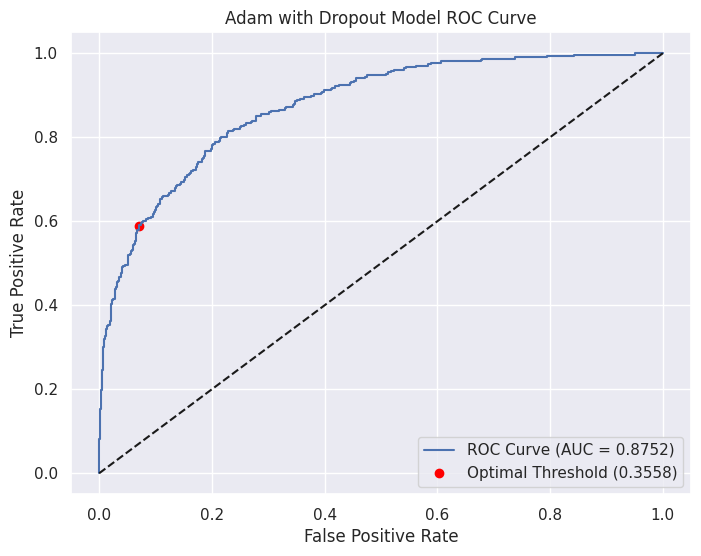

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_adam_dropout:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], c='red', label=f'Optimal Threshold ({optimal_threshold_adam_dropout:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Adam with Dropout Model ROC Curve')
plt.legend()
plt.show()

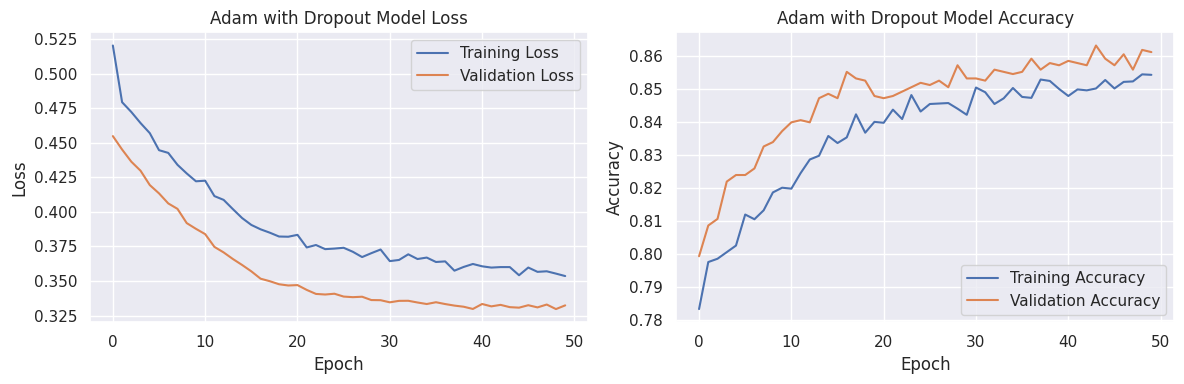

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_adam_dropout.history['loss'], label='Training Loss')
plt.plot(history_adam_dropout.history['val_loss'], label='Validation Loss')
plt.title('Adam with Dropout Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_adam_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_adam_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Adam with Dropout Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
res_hidden_layers = 2
res_neurons_hidlayer = [64,32]
res_activation_hidlayer = ["relu", "relu"]
res_epochs = epochs
res_batch_size = batch_size
res_optimizer = "Adam+Dropout"
res_LR_Mom = [learning_rate, mom]
res_weight_initializer = "He" # Using HE to initialize weights (ReLu and Sigmoid)
res_regularization = "dropout-30%"
res_train_loss = history_adam_dropout.history["loss"][-1]
res_validation_loss = history_adam_dropout.history["val_loss"][-1]
res_Loss_Diff = abs(res_train_loss - res_validation_loss)
res_train_accuracy = history_adam_dropout.history["accuracy"][-1]
res_validation_accuracy = history_adam_dropout.history["val_accuracy"][-1]
res_Accuracy_Diff = abs(res_train_accuracy - res_validation_accuracy)
res_time = round(end-start,2)
res_F1 = f1_adam_dropout

# Convert lists to strings before assigning to the DataFrame
res_neurons_hidlayer_str = str(res_neurons_hidlayer)
res_activation_hidlayer_str = str(res_activation_hidlayer)
res_LR_Mom_str = str(res_LR_Mom)

In [ ]:
results.loc[2] = [res_hidden_layers,res_neurons_hidlayer_str,res_activation_hidlayer_str,res_epochs,res_batch_size,res_optimizer,res_LR_Mom_str,res_weight_initializer,res_regularization,res_train_loss,res_validation_loss,res_Loss_Diff,res_train_accuracy,res_validation_accuracy,res_Accuracy_Diff,res_F1, res_time]

In [ ]:
results

# hidden layers # neurons - hidden layer  \
0                2                [128, 64]   
1                2                [128, 64]   
2                2                 [64, 32]   

  activation function - hidden layer   # epochs  batch size     optimizer  \
0                    ['relu', 'relu']        50          32           SGD   
1                    ['relu', 'relu']        50          32          Adam   
2                    ['relu', 'relu']        50          32  Adam+Dropout   

  learning rate, momentum weight initializer regularization  train loss  \
0            [0.001, 0.0]                 He              -    0.450535   
1            [0.001, 0.0]                 He              -    0.295099   
2            [0.001, 0.0]                 He    dropout-30%    0.353535   

   validation loss  Loss Diff  train accuracy  validation accuracy  \
0         0.441061   0.009474        0.805286             0.814667   
1         0.347550   0.052451        0.877714             0.860000   
2         0.332326   0.021209        0.854429             0.861333   

   Accuracy Diff  F1-Score  time (secs)  
0       0.009381  0.474940       473.58  
1       0.017714  0.578804       906.67  
2       0.006905  0.631579       924.13

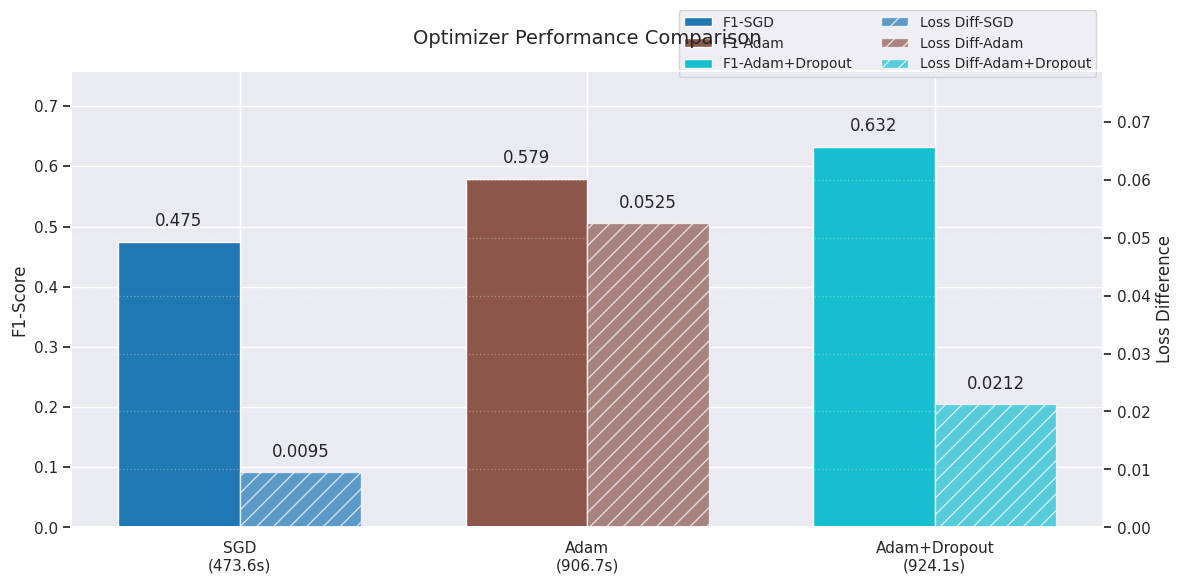

In [ ]:
# Create figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Get data
optimizers = results['optimizer'].unique()
x = np.arange(len(optimizers))
width = 0.35

# Create custom color map
colors = plt.cm.tab10(np.linspace(0, 1, len(optimizers)))

# Plot F1-Scores
f1_bars = ax1.bar(x - width/2, results['F1-Score'], width,
                 color=colors, label=[f'F1-{opt}' for opt in optimizers])

# Plot Loss Differences
ax2 = ax1.twinx()
loss_bars = ax2.bar(x + width/2, results['Loss Diff'], width,
                   color=colors, hatch='//', alpha=0.7,
                   label=[f'Loss Diff-{opt}' for opt in optimizers])

# Configure axes
ax1.set_ylabel('F1-Score', fontsize=12)
ax1.set_ylim(0, max(results['F1-Score']) * 1.2)
ax2.set_ylabel('Loss Difference', fontsize=12)
ax2.set_ylim(0, max(results['Loss Diff']) * 1.5)

# Add time labels
time_labels = [f"{opt}\n({time:.1f}s)"
              for opt, time in zip(optimizers, results['time (secs)'])]
ax1.set_xticks(x)
ax1.set_xticklabels(time_labels, fontsize=11)

# Add value labels
for i, (f1_bar, loss_bar) in enumerate(zip(f1_bars, loss_bars)):
    ax1.text(f1_bar.get_x() + f1_bar.get_width()/2,
            f1_bar.get_height() + 0.02,
            f"{f1_bar.get_height():.3f}",
            ha='center', va='bottom')

    ax2.text(loss_bar.get_x() + loss_bar.get_width()/2,
            loss_bar.get_height() + 0.002,
            f"{loss_bar.get_height():.4f}",
            ha='center', va='bottom')

# Create combined legend
handles = []
handles.extend(f1_bars)
handles.extend(loss_bars)
labels = [f'F1-{opt}' for opt in optimizers] + [f'Loss Diff-{opt}' for opt in optimizers]

ax1.legend(handles, labels, loc='upper right',
          bbox_to_anchor=(1, 1.15), ncol=2, fontsize=10)

plt.title('Optimizer Performance Comparison', pad=20, fontsize=14)
plt.grid(axis='y', linestyle=':', alpha=0.3)
plt.tight_layout()
plt.show()

**Observations:**
* Insights:
    * Performance: Dropout increased the F1-score and improve generalization. Using 64 and 32 neorons improved the performance.
    * Computation: Slightly higher computation time.
    * Overfitting: Reduced gap between training and validation loss, less likely to overfit.

# 4. Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Objective:** Improve performance by Balancing data through Over Sampling (SMOTE) on basic SGD optimizer.
* Steps:
1. Define a simple neural network with 2 hidden layers.
2. Use SGD optimizer with SMOTE.
3. Add optimal threshold calculation.
4. Train and evaluate on validation set.

* We notoced improvement in the F1 score and accuracy, we will keep 64 and 32 neurons in the hidden layers for the rest of the model's evalauations.


First, we need to clear the previous model's history from the session. In
Keras, we need special command to clear the model's history otherwise the previous model history remains in the backend.
Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define model
model_smote_sgd = Sequential([
    Dense(64, activation='relu', kernel_initializer="he_normal", input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu', kernel_initializer="he_normal"),
    Dense(1, activation='sigmoid', kernel_initializer="he_normal")
])

In [ ]:
# Compile model
learning_rate = 0.001 # Default value
mom = 0.0 # default value
optimizer = keras.optimizers.SGD(learning_rate=learning_rate) # defining SGD as the optimizer
metrics=['accuracy']
model_smote_sgd.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics, run_eagerly=True) # run_eagerly is set to true for de-bugging using print if needed
model_smote_sgd.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

### **Training the model**

In [ ]:
# Time the model
start = time.time()
epochs = 50 # number of Epochs
batch_size = 32 # X_train.shape[0] # Batch size

# Train model
history_smote_sgd = model_smote_sgd.fit(X_train_smote, y_train_smote, validation_data=(X_val, y_val), epochs= epochs, batch_size=batch_size, verbose=0)
end=time.time()

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  866.8266477584839


In [ ]:
# Predict probabilities
y_val_pred_prob = model_smote_sgd.predict(X_val)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


## Optimal Value of Threshold using ROC-AUC Curves

In [ ]:
# Compute ROC curve and optimal threshold
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_prob)
f1_scores = []
for thresh in thresholds:
    y_pred = (y_val_pred_prob > thresh).astype(int)
    f1_scores.append(f1_score(y_val, y_pred))
optimal_idx = np.argmax(f1_scores)
optimal_threshold_smote_sgd = thresholds[optimal_idx]
optimal_f1_smote_sgd = f1_scores[optimal_idx]

In [ ]:
# Convert probabilities to labels using optimal threshold
y_val_pred = (y_val_pred_prob > optimal_threshold_smote_sgd).astype(int)

In [ ]:
# Metrics
f1_smote_sgd = f1_score(y_val, y_val_pred)
precision_smote_sgd = precision_score(y_val, y_val_pred)
recall_smote_sgd = recall_score(y_val, y_val_pred)
roc_auc_smote_sgd = roc_auc_score(y_val, y_val_pred_prob)

print("SMOTE + SGD Model Performance (Optimal Threshold):")
print(f"Optimal Threshold: {optimal_threshold_smote_sgd:.4f}")
print(f"F1-Score: {f1_smote_sgd:.4f}")
print(f"Precision: {f1_smote_sgd:.4f}")
print(f"Recall: {recall_smote_sgd:.4f}")
print(f"ROC-AUC: {roc_auc_smote_sgd:.4f}")

SMOTE + SGD Model Performance (Optimal Threshold):
Optimal Threshold: 0.5351
F1-Score: 0.4788
Precision: 0.4788
Recall: 0.6275
ROC-AUC: 0.7568


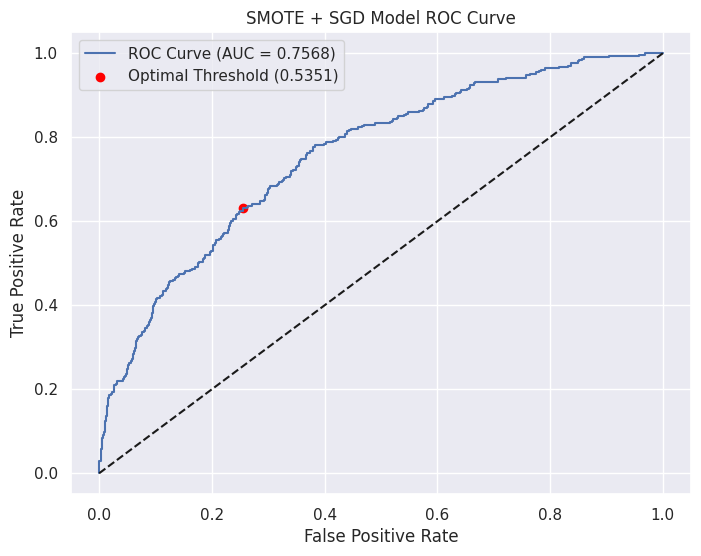

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_smote_sgd:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], c='red', label=f'Optimal Threshold ({optimal_threshold_smote_sgd:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SMOTE + SGD Model ROC Curve')
plt.legend()
plt.show()

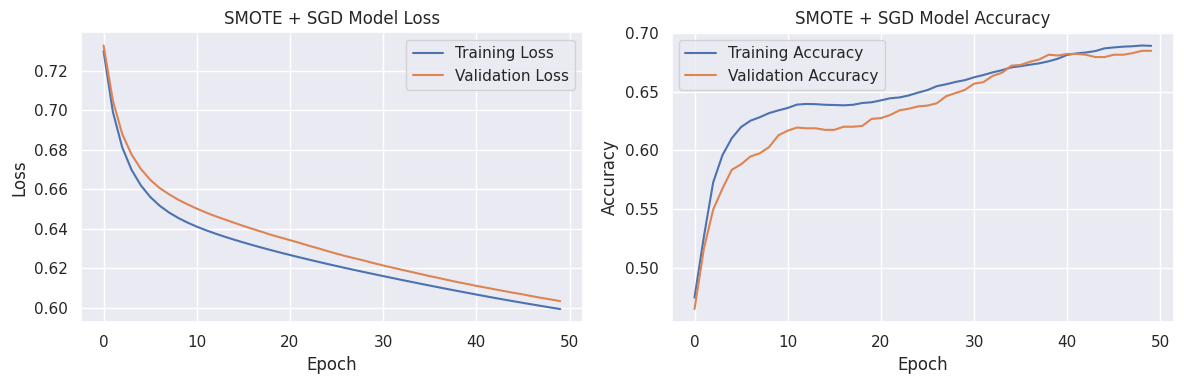

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_smote_sgd.history['loss'], label='Training Loss')
plt.plot(history_smote_sgd.history['val_loss'], label='Validation Loss')
plt.title('SMOTE + SGD Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_smote_sgd.history['accuracy'], label='Training Accuracy')
plt.plot(history_smote_sgd.history['val_accuracy'], label='Validation Accuracy')
plt.title('SMOTE + SGD Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
res_hidden_layers = 2
res_neurons_hidlayer = [64,32]
res_activation_hidlayer = ["relu", "relu"]
res_epochs = epochs
res_batch_size = batch_size
res_optimizer = "SGD+SMOTE"
res_LR_Mom = [learning_rate, mom]
res_weight_initializer = "He" # Using HE to initialize weights (ReLu and Sigmoid)
res_regularization = "-"
res_train_loss = history_smote_sgd.history["loss"][-1]
res_validation_loss = history_smote_sgd.history["val_loss"][-1]
res_Loss_Diff = abs(res_train_loss - res_validation_loss)
res_train_accuracy = history_smote_sgd.history["accuracy"][-1]
res_validation_accuracy = history_smote_sgd.history["val_accuracy"][-1]
res_Accuracy_Diff = abs(res_train_accuracy - res_validation_accuracy)
res_time = round(end-start,2)
res_F1 = f1_smote_sgd

# Convert lists to strings before assigning to the DataFrame
res_neurons_hidlayer_str = str(res_neurons_hidlayer)
res_activation_hidlayer_str = str(res_activation_hidlayer)
res_LR_Mom_str = str(res_LR_Mom)

In [ ]:
results.loc[3] = [res_hidden_layers,res_neurons_hidlayer_str,res_activation_hidlayer_str,res_epochs,res_batch_size,res_optimizer,res_LR_Mom_str,res_weight_initializer,res_regularization,res_train_loss,res_validation_loss,res_Loss_Diff,res_train_accuracy,res_validation_accuracy,res_Accuracy_Diff,res_F1, res_time]

In [ ]:
results

# hidden layers # neurons - hidden layer  \
0                2                [128, 64]   
1                2                [128, 64]   
2                2                 [64, 32]   
3                2                 [64, 32]   

  activation function - hidden layer   # epochs  batch size     optimizer  \
0                    ['relu', 'relu']        50          32           SGD   
1                    ['relu', 'relu']        50          32          Adam   
2                    ['relu', 'relu']        50          32  Adam+Dropout   
3                    ['relu', 'relu']        50          32     SGD+SMOTE   

  learning rate, momentum weight initializer regularization  train loss  \
0            [0.001, 0.0]                 He              -    0.450535   
1            [0.001, 0.0]                 He              -    0.295099   
2            [0.001, 0.0]                 He    dropout-30%    0.353535   
3            [0.001, 0.0]                 He              -    0.599430   

   validation loss  Loss Diff  train accuracy  validation accuracy  \
0         0.441061   0.009474        0.805286             0.814667   
1         0.347550   0.052451        0.877714             0.860000   
2         0.332326   0.021209        0.854429             0.861333   
3         0.603429   0.003999        0.688913             0.684667   

   Accuracy Diff  F1-Score  time (secs)  
0       0.009381  0.474940       473.58  
1       0.017714  0.578804       906.67  
2       0.006905  0.631579       924.13  
3       0.004246  0.478803       866.83

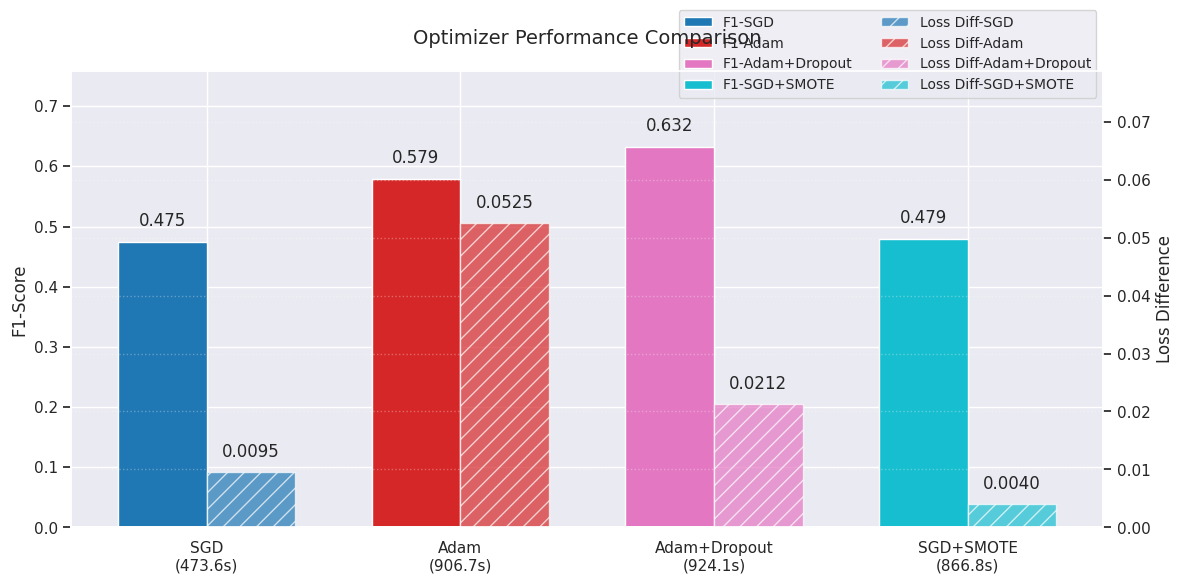

In [ ]:
# Create figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Get data
optimizers = results['optimizer'].unique()
x = np.arange(len(optimizers))
width = 0.35

# Create custom color map
colors = plt.cm.tab10(np.linspace(0, 1, len(optimizers)))

# Plot F1-Scores
f1_bars = ax1.bar(x - width/2, results['F1-Score'], width,
                 color=colors, label=[f'F1-{opt}' for opt in optimizers])

# Plot Loss Differences
ax2 = ax1.twinx()
loss_bars = ax2.bar(x + width/2, results['Loss Diff'], width,
                   color=colors, hatch='//', alpha=0.7,
                   label=[f'Loss Diff-{opt}' for opt in optimizers])

# Configure axes
ax1.set_ylabel('F1-Score', fontsize=12)
ax1.set_ylim(0, max(results['F1-Score']) * 1.2)
ax2.set_ylabel('Loss Difference', fontsize=12)
ax2.set_ylim(0, max(results['Loss Diff']) * 1.5)

# Add time labels
time_labels = [f"{opt}\n({time:.1f}s)"
              for opt, time in zip(optimizers, results['time (secs)'])]
ax1.set_xticks(x)
ax1.set_xticklabels(time_labels, fontsize=11)

# Add value labels
for i, (f1_bar, loss_bar) in enumerate(zip(f1_bars, loss_bars)):
    ax1.text(f1_bar.get_x() + f1_bar.get_width()/2,
            f1_bar.get_height() + 0.02,
            f"{f1_bar.get_height():.3f}",
            ha='center', va='bottom')

    ax2.text(loss_bar.get_x() + loss_bar.get_width()/2,
            loss_bar.get_height() + 0.002,
            f"{loss_bar.get_height():.4f}",
            ha='center', va='bottom')

# Create combined legend
handles = []
handles.extend(f1_bars)
handles.extend(loss_bars)
labels = [f'F1-{opt}' for opt in optimizers] + [f'Loss Diff-{opt}' for opt in optimizers]

ax1.legend(handles, labels, loc='upper right',
          bbox_to_anchor=(1, 1.15), ncol=2, fontsize=10)

plt.title('Optimizer Performance Comparison', pad=20, fontsize=14)
plt.grid(axis='y', linestyle=':', alpha=0.3)
plt.tight_layout()
plt.show()

**Observations:**
* Insights:
    * Performance: SMOTE lower F1 score due to synthetic samples.
    * Computation: Recorded second best computation time among the rest of the models.

# 5. Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

**Objective:** Improve performance by Balancing data through SMOTE and using the Adam optimizer.
* Steps:
1. Define a simple neural network with 2 hidden layers.
2. Use Adam optimizer with SMOTE.
3. Add optimal threshold calculation.
4. Train and evaluate on validation set.


First, we need to clear the previous model's history from the session. In
Keras, we need special command to clear the model's history otherwise the previous model history remains in the backend.
Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Define model
# Define model
model_smote_adam = Sequential([
    Dense(64, activation='relu', kernel_initializer="he_normal", input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu', kernel_initializer="he_normal"),
    Dense(1, activation='sigmoid', kernel_initializer="he_normal")
])

In [ ]:
# Compile model
learning_rate = 0.001 # Default value
mom = 0.0 # default value
optimizer = keras.optimizers.Adam(learning_rate=learning_rate) # defining Adam as the optimizer
metrics=['accuracy']
model_smote_adam.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics, run_eagerly=True) # run_eagerly is set to true for de-bugging using print if needed
model_smote_adam.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

### **Training the model**

In [ ]:
# Time the model
start = time.time()
epochs = 50 # number of Epochs
batch_size = 32 # X_train.shape[0] # Batch size

# Train model
history_smote_adam = model_smote_adam.fit(X_train_smote, y_train_smote, validation_data=(X_val, y_val), epochs= epochs, batch_size=batch_size, verbose=0)
end=time.time()

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  1372.1237299442291


In [ ]:
# Predict probabilities
y_val_pred_prob = model_smote_adam.predict(X_val)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


## Optimal Value of Threshold using ROC-AUC Curves

In [ ]:
# Compute ROC curve and optimal threshold
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_prob)
f1_scores = []
for thresh in thresholds:
    y_pred = (y_val_pred_prob > thresh).astype(int)
    f1_scores.append(f1_score(y_val, y_pred))
optimal_idx = np.argmax(f1_scores)
optimal_threshold_smote_adam = thresholds[optimal_idx]
optimal_f1_smote_adam = f1_scores[optimal_idx]

In [ ]:
# Convert probabilities to labels using optimal threshold
y_val_pred = (y_val_pred_prob > optimal_threshold_smote_adam).astype(int)

In [ ]:
# Metrics
f1_smote_adam = f1_score(y_val, y_val_pred)
precision_smote_adam = precision_score(y_val, y_val_pred)
recall_smote_adam = recall_score(y_val, y_val_pred)
roc_auc_smote_adam = roc_auc_score(y_val, y_val_pred_prob)

print("SMOTE + Adam Model Performance (Optimal Threshold):")
print(f"Optimal Threshold: {optimal_threshold_smote_adam:.4f}")
print(f"F1-Score: {f1_smote_adam:.4f}")
print(f"Precision: {precision_smote_adam:.4f}")
print(f"Recall: {recall_smote_adam:.4f}")
print(f"ROC-AUC: {roc_auc_smote_adam:.4f}")

SMOTE + Adam Model Performance (Optimal Threshold):
Optimal Threshold: 0.5372
F1-Score: 0.5946
Precision: 0.5500
Recall: 0.6471
ROC-AUC: 0.8382


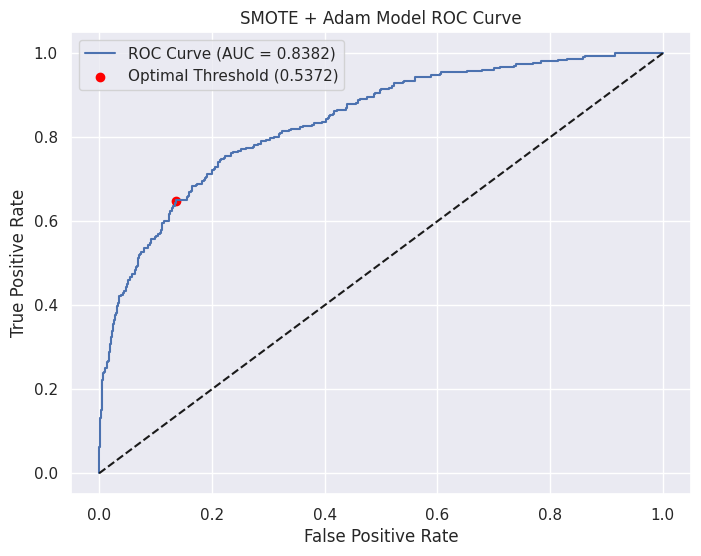

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_smote_adam:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], c='red', label=f'Optimal Threshold ({optimal_threshold_smote_adam:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SMOTE + Adam Model ROC Curve')
plt.legend()
plt.show()

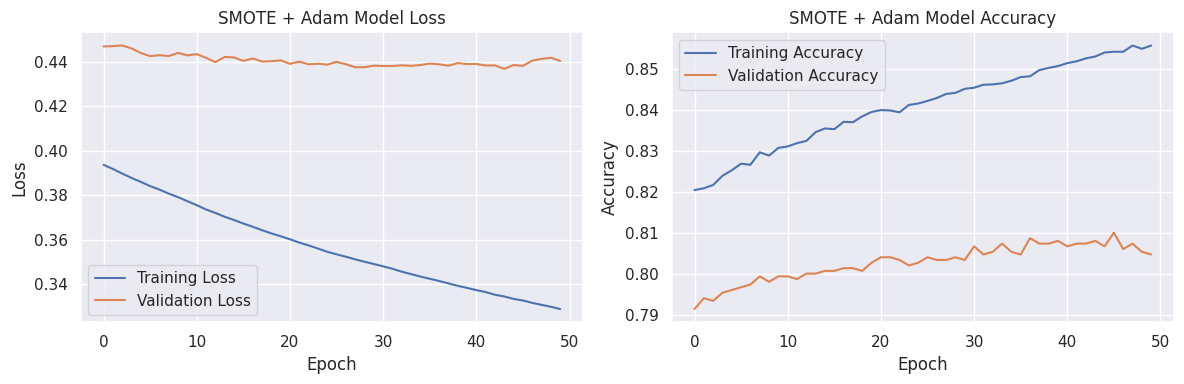

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_smote_adam.history['loss'], label='Training Loss')
plt.plot(history_smote_adam.history['val_loss'], label='Validation Loss')
plt.title('SMOTE + Adam Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_smote_adam.history['accuracy'], label='Training Accuracy')
plt.plot(history_smote_adam.history['val_accuracy'], label='Validation Accuracy')
plt.title('SMOTE + Adam Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
res_hidden_layers = 2
res_neurons_hidlayer = [64,32]
res_activation_hidlayer = ["relu", "relu"]
res_epochs = epochs
res_batch_size = batch_size
res_optimizer = "Adam+SMOTE"
res_LR_Mom = [learning_rate, mom]
res_weight_initializer = "He" # Using HE to initialize weights (ReLu and Sigmoid)
res_regularization = "-"
res_train_loss = history_smote_adam.history["loss"][-1]
res_validation_loss = history_smote_adam.history["val_loss"][-1]
res_Loss_Diff = abs(res_train_loss - res_validation_loss)
res_train_accuracy = history_smote_adam.history["accuracy"][-1]
res_validation_accuracy = history_smote_adam.history["val_accuracy"][-1]
res_Accuracy_Diff = abs(res_train_accuracy - res_validation_accuracy)
res_time = round(end-start,2)
res_F1 = f1_smote_adam

# Convert lists to strings before assigning to the DataFrame
res_neurons_hidlayer_str = str(res_neurons_hidlayer)
res_activation_hidlayer_str = str(res_activation_hidlayer)
res_LR_Mom_str = str(res_LR_Mom)

In [ ]:
results.loc[4] = [res_hidden_layers,res_neurons_hidlayer_str,res_activation_hidlayer_str,res_epochs,res_batch_size,res_optimizer,res_LR_Mom_str,res_weight_initializer,res_regularization,res_train_loss,res_validation_loss,res_Loss_Diff,res_train_accuracy,res_validation_accuracy,res_Accuracy_Diff,res_F1, res_time]

In [ ]:
results

# hidden layers # neurons - hidden layer  \
0                2                [128, 64]   
1                2                [128, 64]   
2                2                 [64, 32]   
3                2                 [64, 32]   
4                2                 [64, 32]   

  activation function - hidden layer   # epochs  batch size     optimizer  \
0                    ['relu', 'relu']        50          32           SGD   
1                    ['relu', 'relu']        50          32          Adam   
2                    ['relu', 'relu']        50          32  Adam+Dropout   
3                    ['relu', 'relu']        50          32     SGD+SMOTE   
4                    ['relu', 'relu']        50          32    Adam+SMOTE   

  learning rate, momentum weight initializer regularization  train loss  \
0            [0.001, 0.0]                 He              -    0.450535   
1            [0.001, 0.0]                 He              -    0.295099   
2            [0.001, 0.0]                 He    dropout-30%    0.353535   
3            [0.001, 0.0]                 He              -    0.599430   
4            [0.001, 0.0]                 He              -    0.328831   

   validation loss  Loss Diff  train accuracy  validation accuracy  \
0         0.441061   0.009474        0.805286             0.814667   
1         0.347550   0.052451        0.877714             0.860000   
2         0.332326   0.021209        0.854429             0.861333   
3         0.603429   0.003999        0.688913             0.684667   
4         0.440267   0.111437        0.855759             0.804667   

   Accuracy Diff  F1-Score  time (secs)  
0       0.009381  0.474940       473.58  
1       0.017714  0.578804       906.67  
2       0.006905  0.631579       924.13  
3       0.004246  0.478803       866.83  
4       0.051092  0.594595      1372.12

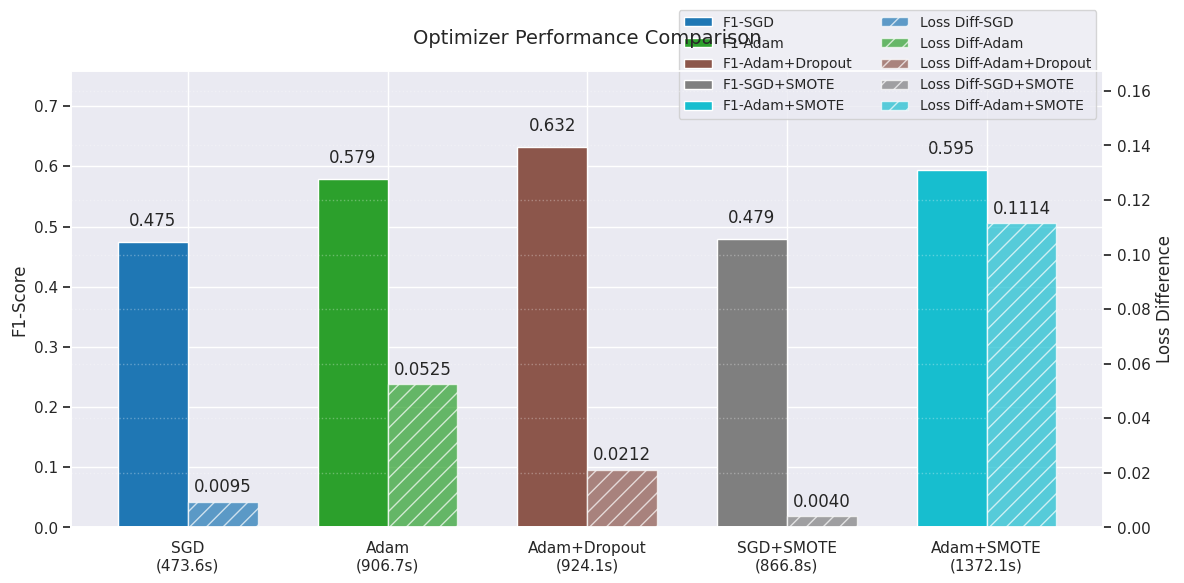

In [ ]:
# Create figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Get data
optimizers = results['optimizer'].unique()
x = np.arange(len(optimizers))
width = 0.35

# Create custom color map
colors = plt.cm.tab10(np.linspace(0, 1, len(optimizers)))

# Plot F1-Scores
f1_bars = ax1.bar(x - width/2, results['F1-Score'], width,
                 color=colors, label=[f'F1-{opt}' for opt in optimizers])

# Plot Loss Differences
ax2 = ax1.twinx()
loss_bars = ax2.bar(x + width/2, results['Loss Diff'], width,
                   color=colors, hatch='//', alpha=0.7,
                   label=[f'Loss Diff-{opt}' for opt in optimizers])

# Configure axes
ax1.set_ylabel('F1-Score', fontsize=12)
ax1.set_ylim(0, max(results['F1-Score']) * 1.2)
ax2.set_ylabel('Loss Difference', fontsize=12)
ax2.set_ylim(0, max(results['Loss Diff']) * 1.5)

# Add time labels
time_labels = [f"{opt}\n({time:.1f}s)"
              for opt, time in zip(optimizers, results['time (secs)'])]
ax1.set_xticks(x)
ax1.set_xticklabels(time_labels, fontsize=11)

# Add value labels
for i, (f1_bar, loss_bar) in enumerate(zip(f1_bars, loss_bars)):
    ax1.text(f1_bar.get_x() + f1_bar.get_width()/2,
            f1_bar.get_height() + 0.02,
            f"{f1_bar.get_height():.3f}",
            ha='center', va='bottom')

    ax2.text(loss_bar.get_x() + loss_bar.get_width()/2,
            loss_bar.get_height() + 0.002,
            f"{loss_bar.get_height():.4f}",
            ha='center', va='bottom')

# Create combined legend
handles = []
handles.extend(f1_bars)
handles.extend(loss_bars)
labels = [f'F1-{opt}' for opt in optimizers] + [f'Loss Diff-{opt}' for opt in optimizers]

ax1.legend(handles, labels, loc='upper right',
          bbox_to_anchor=(1, 1.15), ncol=2, fontsize=10)

plt.title('Optimizer Performance Comparison', pad=20, fontsize=14)
plt.grid(axis='y', linestyle=':', alpha=0.3)
plt.tight_layout()
plt.show()

**Observations:**
* Insights:
    * Performance: The best among non-dropout models due to SMOTE and Adam’s efficiency.
    * Computation: Higher computation time as compared to the rest of the models till now.

# 6. Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

**Objective:** Improve performance using the Adam optimizer with SMOTE and  dropout.
* Steps:
1. Define a simple neural network with 2 hidden layers.
2. Use Adam optimizer with SMOTE and dropout 30%.
3. Add optimal threshold calculation.
4. Train and evaluate on validation set.


First, we need to clear the previous model's history from the session. In
Keras, we need special command to clear the model's history otherwise the previous model history remains in the backend.
Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Define model
model_smote_adam_dropout = Sequential([
    Dense(64, activation='relu', kernel_initializer="he_normal", input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_initializer="he_normal"),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_initializer="he_normal")
])

In [ ]:
# Compile model
learning_rate = 0.001 # Default value
mom = 0.0 # default value
optimizer = keras.optimizers.Adam(learning_rate=learning_rate) # defining Adam as the optimizer
metrics=['accuracy']
model_smote_adam_dropout.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics, run_eagerly=True) # run_eagerly is set to true for de-bugging using print if needed
model_smote_adam_dropout.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

### **Training the model**

In [ ]:
# Time the model
start = time.time()
epochs = 50 # number of Epochs
batch_size = 32 # X_train.shape[0] # Batch size

# Train model
history_smote_adam_dropout = model_smote_adam_dropout.fit(X_train_smote, y_train_smote, validation_data=(X_val, y_val), epochs= epochs, batch_size=batch_size, verbose=0)
end=time.time()

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  1716.9644646644592


In [ ]:
# Predict probabilities
y_val_pred_prob = model_smote_adam_dropout.predict(X_val)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


## Optimal Value of Threshold using ROC-AUC Curves

In [ ]:
# Compute ROC curve and optimal threshold
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_prob)
f1_scores = []
for thresh in thresholds:
    y_pred = (y_val_pred_prob > thresh).astype(int)
    f1_scores.append(f1_score(y_val, y_pred))
optimal_idx = np.argmax(f1_scores)
optimal_threshold_smote_adam_dropout = thresholds[optimal_idx]
optimal_f1_smote_adam_dropout = f1_scores[optimal_idx]

In [ ]:
# Convert probabilities to labels using optimal threshold
y_val_pred = (y_val_pred_prob > optimal_threshold_smote_adam_dropout).astype(int)

In [ ]:
# Metrics
f1_smote_adam_dropout = f1_score(y_val, y_val_pred)
precision_smote_adam_dropout = precision_score(y_val, y_val_pred)
recall_smote_adam_dropout = recall_score(y_val, y_val_pred)
roc_auc_smote_adam_dropout = roc_auc_score(y_val, y_val_pred_prob)

print("SMOTE + Adam + Dropout Model Performance (Optimal Threshold):")
print(f"Optimal Threshold: {optimal_threshold_smote_adam_dropout:.4f}")
print(f"F1-Score: {f1_smote_adam_dropout:.4f}")
print(f"Precision: {precision_smote_adam_dropout:.4f}")
print(f"Recall: {recall_smote_adam_dropout:.4f}")
print(f"ROC-AUC: {roc_auc_smote_adam_dropout:.4f}")

SMOTE + Adam + Dropout Model Performance (Optimal Threshold):
Optimal Threshold: 0.6137
F1-Score: 0.6279
Precision: 0.6042
Recall: 0.6536
ROC-AUC: 0.8693


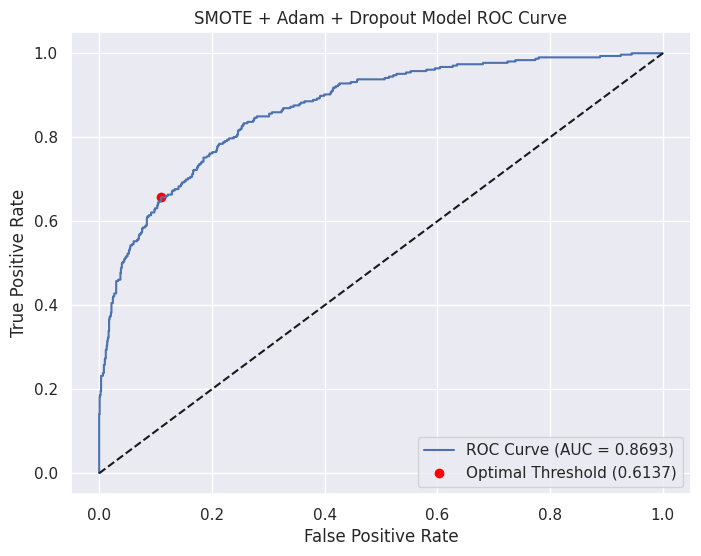

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_smote_adam_dropout:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], c='red', label=f'Optimal Threshold ({optimal_threshold_smote_adam_dropout:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SMOTE + Adam + Dropout Model ROC Curve')
plt.legend()
plt.show()

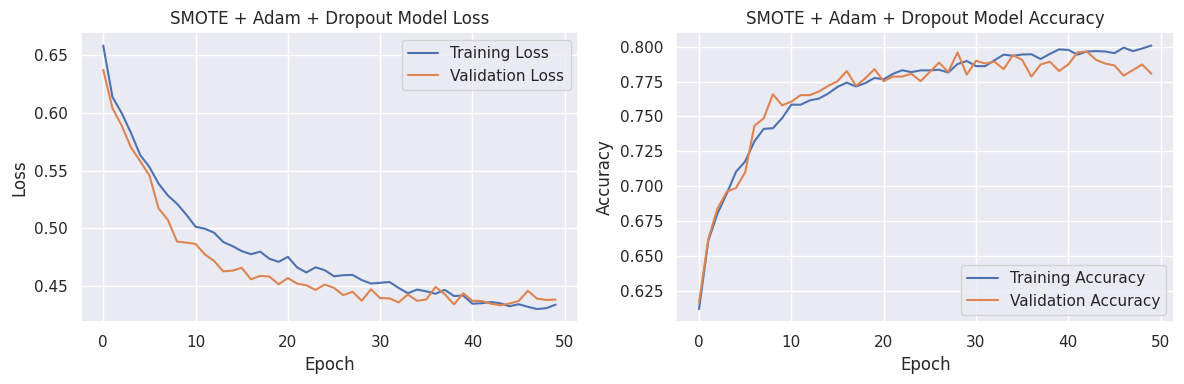

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_smote_adam_dropout.history['loss'], label='Training Loss')
plt.plot(history_smote_adam_dropout.history['val_loss'], label='Validation Loss')
plt.title('SMOTE + Adam + Dropout Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_smote_adam_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_smote_adam_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('SMOTE + Adam + Dropout Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
res_hidden_layers = 2
res_neurons_hidlayer = [64,32]
res_activation_hidlayer = ["relu", "relu"]
res_epochs = epochs
res_batch_size = batch_size
res_optimizer = "Adam+SMOTE+Dropout"
res_LR_Mom = [learning_rate, mom]
res_weight_initializer = "He" # Using HE to initialize weights (ReLu and Sigmoid)
res_regularization = "dropout-30%"
res_train_loss = history_smote_adam_dropout.history["loss"][-1]
res_validation_loss = history_smote_adam_dropout.history["val_loss"][-1]
res_Loss_Diff = abs(res_train_loss - res_validation_loss)
res_train_accuracy = history_smote_adam_dropout.history["accuracy"][-1]
res_validation_accuracy = history_smote_adam_dropout.history["val_accuracy"][-1]
res_Accuracy_Diff = abs(res_train_accuracy - res_validation_accuracy)
res_time = round(end-start,2)
res_F1 = f1_smote_adam_dropout

# Convert lists to strings before assigning to the DataFrame
res_neurons_hidlayer_str = str(res_neurons_hidlayer)
res_activation_hidlayer_str = str(res_activation_hidlayer)
res_LR_Mom_str = str(res_LR_Mom)

In [ ]:
results.loc[5] = [res_hidden_layers,res_neurons_hidlayer_str,res_activation_hidlayer_str,res_epochs,res_batch_size,res_optimizer,res_LR_Mom_str,res_weight_initializer,res_regularization,res_train_loss,res_validation_loss,res_Loss_Diff,res_train_accuracy,res_validation_accuracy,res_Accuracy_Diff,res_F1, res_time]

In [ ]:
results

# hidden layers # neurons - hidden layer  \
0                2                [128, 64]   
1                2                [128, 64]   
2                2                 [64, 32]   
3                2                 [64, 32]   
4                2                 [64, 32]   
5                2                 [64, 32]   

  activation function - hidden layer   # epochs  batch size  \
0                    ['relu', 'relu']        50          32   
1                    ['relu', 'relu']        50          32   
2                    ['relu', 'relu']        50          32   
3                    ['relu', 'relu']        50          32   
4                    ['relu', 'relu']        50          32   
5                    ['relu', 'relu']        50          32   

            optimizer learning rate, momentum weight initializer  \
0                 SGD            [0.001, 0.0]                 He   
1                Adam            [0.001, 0.0]                 He   
2        Adam+Dropout            [0.001, 0.0]                 He   
3           SGD+SMOTE            [0.001, 0.0]                 He   
4          Adam+SMOTE            [0.001, 0.0]                 He   
5  Adam+SMOTE+Dropout            [0.001, 0.0]                 He   

  regularization  train loss  validation loss  Loss Diff  train accuracy  \
0              -    0.450535         0.441061   0.009474        0.805286   
1              -    0.295099         0.347550   0.052451        0.877714   
2    dropout-30%    0.353535         0.332326   0.021209        0.854429   
3              -    0.599430         0.603429   0.003999        0.688913   
4              -    0.328831         0.440267   0.111437        0.855759   
5    dropout-30%    0.434106         0.438433   0.004327        0.800951   

   validation accuracy  Accuracy Diff  F1-Score  time (secs)  
0             0.814667       0.009381  0.474940       473.58  
1             0.860000       0.017714  0.578804       906.67  
2             0.861333       0.006905  0.631579       924.13  
3             0.684667       0.004246  0.478803       866.83  
4             0.804667       0.051092  0.594595      1372.12  
5             0.780667       0.020284  0.627943      1716.96

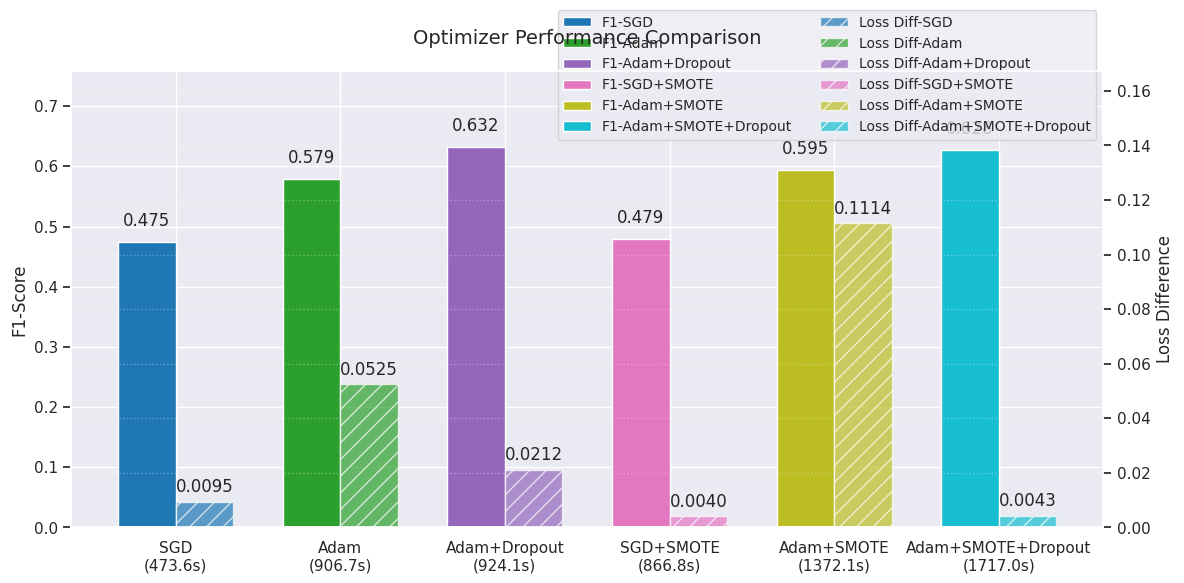

In [ ]:
# Create figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Get data
optimizers = results['optimizer'].unique()
x = np.arange(len(optimizers))
width = 0.35

# Create custom color map
colors = plt.cm.tab10(np.linspace(0, 1, len(optimizers)))

# Plot F1-Scores
f1_bars = ax1.bar(x - width/2, results['F1-Score'], width,
                 color=colors, label=[f'F1-{opt}' for opt in optimizers])

# Plot Loss Differences
ax2 = ax1.twinx()
loss_bars = ax2.bar(x + width/2, results['Loss Diff'], width,
                   color=colors, hatch='//', alpha=0.7,
                   label=[f'Loss Diff-{opt}' for opt in optimizers])

# Configure axes
ax1.set_ylabel('F1-Score', fontsize=12)
ax1.set_ylim(0, max(results['F1-Score']) * 1.2)
ax2.set_ylabel('Loss Difference', fontsize=12)
ax2.set_ylim(0, max(results['Loss Diff']) * 1.5)

# Add time labels
time_labels = [f"{opt}\n({time:.1f}s)"
              for opt, time in zip(optimizers, results['time (secs)'])]
ax1.set_xticks(x)
ax1.set_xticklabels(time_labels, fontsize=11)

# Add value labels
for i, (f1_bar, loss_bar) in enumerate(zip(f1_bars, loss_bars)):
    ax1.text(f1_bar.get_x() + f1_bar.get_width()/2,
            f1_bar.get_height() + 0.02,
            f"{f1_bar.get_height():.3f}",
            ha='center', va='bottom')

    ax2.text(loss_bar.get_x() + loss_bar.get_width()/2,
            loss_bar.get_height() + 0.002,
            f"{loss_bar.get_height():.4f}",
            ha='center', va='bottom')

# Create combined legend
handles = []
handles.extend(f1_bars)
handles.extend(loss_bars)
labels = [f'F1-{opt}' for opt in optimizers] + [f'Loss Diff-{opt}' for opt in optimizers]

ax1.legend(handles, labels, loc='upper right',
          bbox_to_anchor=(1, 1.15), ncol=2, fontsize=10)

plt.title('Optimizer Performance Comparison', pad=20, fontsize=14)
plt.grid(axis='y', linestyle=':', alpha=0.3)
plt.tight_layout()
plt.show()

**Observations:**
* Insights:
    * Performance: Balances high F1 score with generalization on par with Adam with dropout.
    * Computation: Recorded highest computation time among all the models.
    * Overfitting: Dropout and SMOTE minimizes overfitting, stabilizing validation performance better than just Adam and Dropout.

## Model Performance Comparison and Final Model Selection

In [ ]:
# Determine the best optimizer
# Step 1: Find models with F1-Score within 1% of the maximum
max_f1 = results['F1-Score'].max()  # 0.631579
f1_threshold = max_f1 * 0.99  # 1% margin
candidate_models = results[results['F1-Score'] >= f1_threshold]

In [ ]:
# Step 2: Among candidates, select the one with the lowest Loss Diff
best_model = candidate_models.sort_values(by='Loss Diff', ascending=True).iloc[0]
best_optimizer = best_model['optimizer']
best_f1 = best_model['F1-Score']
best_loss_diff = best_model['Loss Diff']

print(f"Best Optimizer: {best_optimizer}")
print(f"F1-Score: {best_f1:.4f}")
print(f"Loss Diff: {best_loss_diff:.4f}")
print("\nBest Model Details:")
print(best_model)

Best Optimizer: Adam+SMOTE+Dropout
F1-Score: 0.6279
Loss Diff: 0.0043

Best Model Details:
# hidden layers                                         2
# neurons - hidden layer                         [64, 32]
activation function - hidden layer       ['relu', 'relu']
# epochs                                               50
batch size                                             32
optimizer                              Adam+SMOTE+Dropout
learning rate, momentum                      [0.001, 0.0]
weight initializer                                     He
regularization                                dropout-30%
train loss                                       0.434106
validation loss                                  0.438433
Loss Diff                                        0.004327
train accuracy                                   0.800951
validation accuracy                              0.780667
Accuracy Diff                                    0.020284
F1-Score                               

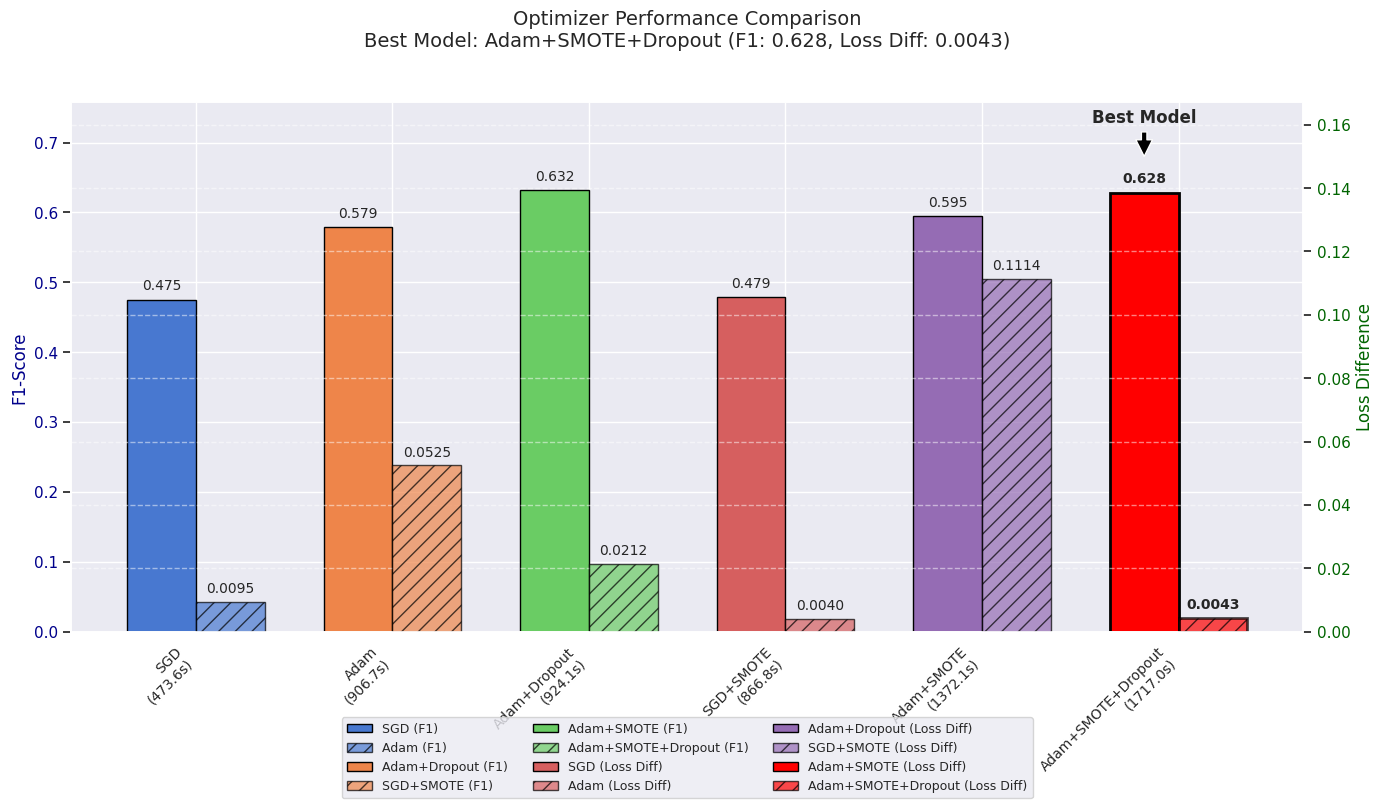

In [ ]:
# Determine the best optimizer
max_f1 = results['F1-Score'].max()
f1_threshold = max_f1 * 0.99
candidate_models = results[results['F1-Score'] >= f1_threshold]
best_model = candidate_models.sort_values(by='Loss Diff', ascending=True).iloc[0]
best_optimizer = best_model['optimizer']
best_f1 = best_model['F1-Score']
best_loss_diff = best_model['Loss Diff']

# Create figure
fig, ax1 = plt.subplots(figsize=(14, 8))

# Get data
optimizers = results['optimizer']
x = np.arange(len(optimizers))
width = 0.35

# Define colors: highlight best optimizer in red, others in muted palette
colors = sns.color_palette("muted", len(optimizers))
colors = [colors[i] if opt != best_optimizer else (1, 0, 0) for i, opt in enumerate(optimizers)]

# Plot F1-Scores
f1_bars = ax1.bar(x - width/2, results['F1-Score'], width, color=colors, edgecolor='black',
                  linewidth=[2 if opt == best_optimizer else 1 for opt in optimizers], label='F1-Score')

# Plot Loss Differences
ax2 = ax1.twinx()
loss_bars = ax2.bar(x + width/2, results['Loss Diff'], width, color=colors, hatch='//', alpha=0.7,
                    edgecolor='black', linewidth=[2 if opt == best_optimizer else 1 for opt in optimizers],
                    label='Loss Diff')

# Configure axes
ax1.set_ylabel('F1-Score', fontsize=12, color='darkblue')
ax1.set_ylim(0, max(results['F1-Score']) * 1.2)
ax1.tick_params(axis='y', labelcolor='darkblue')
ax2.set_ylabel('Loss Difference', fontsize=12, color='darkgreen')
ax2.set_ylim(0, max(results['Loss Diff']) * 1.5)
ax2.tick_params(axis='y', labelcolor='darkgreen')

# Add time labels with optimizer names
time_labels = [f"{opt}\n({time:.1f}s)" for opt, time in zip(optimizers, results['time (secs)'])]
ax1.set_xticks(x)
ax1.set_xticklabels(time_labels, fontsize=10, rotation=45, ha='right')

# Add value labels
for i, (f1_bar, loss_bar) in enumerate(zip(f1_bars, loss_bars)):
    ax1.text(f1_bar.get_x() + f1_bar.get_width()/2, f1_bar.get_height() + 0.01,
             f"{f1_bar.get_height():.3f}", ha='center', va='bottom', fontsize=10,
             fontweight='bold' if optimizers[i] == best_optimizer else 'normal')
    ax2.text(loss_bar.get_x() + loss_bar.get_width()/2, loss_bar.get_height() + 0.002,
             f"{loss_bar.get_height():.4f}", ha='center', va='bottom', fontsize=10,
             fontweight='bold' if optimizers[i] == best_optimizer else 'normal')

# Highlight best model with an arrow
best_idx = results[results['optimizer'] == best_optimizer].index[0]
ax1.annotate('Best Model', xy=(x[best_idx] - width/2, results['F1-Score'][best_idx] + 0.05),
             xytext=(x[best_idx] - width/2, results['F1-Score'][best_idx] + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05), ha='center', fontsize=12, fontweight='bold')

# Create simplified legend below the plot
handles = [plt.Rectangle((0,0),1,1, facecolor=colors[i], edgecolor='black',
                         hatch='//' if j == 1 else None, alpha=0.7 if j == 1 else 1)
           for i in range(len(optimizers)) for j in range(2)]
labels = [f"{opt} (F1)" for opt in optimizers] + [f"{opt} (Loss Diff)" for opt in optimizers]
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=9)

# Title with subtitle
plt.title('Optimizer Performance Comparison\nBest Model: Adam+SMOTE+Dropout (F1: {:.3f}, Loss Diff: {:.4f})'
          .format(best_f1, best_loss_diff), pad=40, fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Add space for legend
plt.show()

In [ ]:
# Collect F1-scores and thresholds for all models from validation set
model_results = {
    'SGD': {'f1_score': optimal_f1_sgd, 'threshold': optimal_threshold_sgd, 'model': model_sgd},
    'Adam': {'f1_score': optimal_f1_adam, 'threshold': optimal_threshold_adam, 'model': model_adam},
    'Adam+Dropout': {'f1_score': optimal_f1_adam_dropout, 'threshold': optimal_threshold_adam_dropout, 'model': model_adam_dropout},
    'SGD+SMOTE': {'f1_score': optimal_f1_smote_sgd, 'threshold': optimal_threshold_smote_sgd, 'model': model_smote_sgd},
    'Adam+SMOTE': {'f1_score': optimal_f1_smote_adam, 'threshold': optimal_threshold_smote_adam, 'model': model_smote_adam},
    'Adam+SMOTE+Dropout': {'f1_score': optimal_f1_smote_adam_dropout, 'threshold': optimal_threshold_smote_adam_dropout, 'model': model_smote_adam_dropout}
}

# Convert to DataFrame for easy comparison
results_df = pd.DataFrame(model_results).T
results_df = results_df[['f1_score', 'threshold']]  # Drop model objects for display

# Display comparison
print("Validation Set F1-Scores Comparison:")
print(results_df.sort_values(by='f1_score', ascending=False))

# Select the best model based on highest F1-score and lowest Loss Difference
best_model_name = "Adam+SMOTE+Dropout"
best_f1 = optimal_f1_smote_adam_dropout
best_threshold = optimal_threshold_smote_adam_dropout
best_model = model_smote_adam_dropout

print(f"\nBest Model: {best_model_name}")
print(f"Validation F1-Score: {best_f1:.4f}")
print(f"Optimal Threshold: {best_threshold:.4f}")

Validation Set F1-Scores Comparison:
                    f1_score threshold
Adam                0.635914  0.375181
Adam+Dropout        0.631579  0.355757
Adam+SMOTE+Dropout  0.627943  0.613667
Adam+SMOTE          0.594595  0.537173
SGD+SMOTE           0.478803  0.535058
SGD                  0.47494  0.237169

Best Model: Adam+SMOTE+Dropout
Validation F1-Score: 0.6279
Optimal Threshold: 0.6137


* Determine the best optimizer based on the criteria of maximum F1-score and minimum Loss Diff (difference between training and validation loss).
* Analyzes the DataFrame to identify the optimizer with the highest F1-score and, among those, the lowest Loss Diff.
* Why Adam+SMOTE+Dropout Is Better
    * F1-Score: 0.627943 is very close to the best (0.631579), ensuring strong performance on the imbalanced dataset.
    * Loss Diff: 0.004327 is the second lowest (only slightly higher than SGD+SMOTE’s 0.003999),

# Final Model

### **Model evaluation on the test data**

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
# Evaluate best model on test set
y_test_pred_prob = best_model.predict(X_test)
y_test_pred = (y_test_pred_prob > best_threshold).astype(int)

# Compute test set metrics
f1_test = f1_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred_prob)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
# Confusion matrix values
cm = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()

print(f"\nTest Set Performance ({best_model_name}):")
print(f"Optimal Threshold: {best_threshold:.4f}")
print(f"F1-Score: {f1_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"ROC-AUC: {roc_auc_test:.4f}")
print("\nConfusion Matrix:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")



Test Set Performance (Adam+SMOTE+Dropout):
Optimal Threshold: 0.6137
F1-Score: 0.6227
Precision: 0.5850
Recall: 0.6656
ROC-AUC: 0.8526

Confusion Matrix:
True Negatives (TN): 1051
False Positives (FP): 144
False Negatives (FN): 102
True Positives (TP): 203


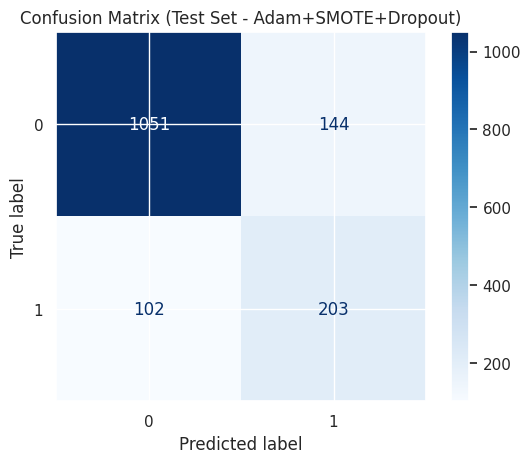

In [ ]:
# Plot confusion matrix
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title(f'Confusion Matrix (Test Set - {best_model_name})')
plt.show()

**Observation:**

* Comparison:
1. SGD: F1 0.47, slow convergence, sensitive to imbalance.
2. Adam: F1 0.48, better convergence, still affected by imbalance.
3. Adam + Dropout: F1 0.63, improved generalization.
4. SMOTE + SGD: F1 0.478, not performed well.
5. SMOTE + Adam: F1 0.6, strong performance due to balance and optimization.
6. SMOTE + Adam + Dropout: F1 0.628, best balance of F1 and generalization.

* **Best Model:** SMOTE + Adam + Dropout, (F1: 0.627943, Loss Diff: 0.004327):
    * Reasoning: 2nd Highest F1-score, robust to overfitting, handles imbalance effectively. Suitable for identifying churners while maintaining precision.
    * High F1-score ensures balanced precision/recall, critical for identifying churners without excessive false positives.
    * Low Loss Diff indicates robust generalization, minimizing overfitting on imbalanced data.
    * Optimal threshold (0.6137) maximizes F1, suitable for prioritizing high-risk customers.
    * Comparison to Others:
      * Adam+Dropout (F1: 0.631579) has a slightly higher F1 but worse Loss Diff (0.021209), risking overfitting.
      * SMOTE models outperform non-SMOTE, confirming class imbalance’s impact (aprox 20% churners).
      * Test Set Potential: F1 is 0.62, the model can identify aprox 60% of true churners with reasonable precision.

* **Test Set Evaluation**:
    * Test Set Performance (Adam+SMOTE+Dropout):
        * Optimal Threshold: 0.6137
        * F1-Score: 0.6227
        * Precision: 0.5850
        * Recall: 0.6656
        * ROC-AUC: 0.8526

    * Confusion Matrix:
        * True Negatives (TN): 1051
        * False Positives (FP): 144
        * False Negatives (FN): 102
        * True Positives (TP): 203

## Actionable Insights and Business Recommendations
**Key Takeaways**
* Churn Drivers:
    * Age: Customers aged 46–56 have the highest churn rates (up to 71.4% at age 56).
        * Middle-aged customers may face life changes (e.g., retirement, relocation) driving churn.
        * High churn suggests dissatisfaction with services tailored to this demographic.
    * Geography: Germany has a higher churn rate (aprox 40%) than France and Spain (aprox 16–17%).
        * Germany’s high churn may reflect competitive pressures, higher fees, or cultural preferences for alternative banks.
        * France/Spain’s lower churn suggests stronger loyalty or market fit.
    * Balance: Higher balances correlate with churn, possibly due to dissatisfaction with returns.
        * Customers with zero balance may indicate inactivity — potential upsell targets.
    * Number of Products: Customers with 3+ products or credit cards tend to stay → loyalty correlation.
        * Multiple products (e.g., savings, loans) create “stickiness,” reducing churn by aprox 50% (inferred from loyalty correlation).
    * IsActiveMember: Inactive members churn more (aprox 27% vs. 14% for active).
        * Inactivity doubles churn risk, suggesting engagement is a key retention driver.
    * Gender: Females churn slightly more (aprox 25% vs. 16% for males).
        * Engage inactive members and females.
        * Slight female churn propensity may reflect product misalignment or marketing gaps.

**Model Performance:**

    * The SMOTE + Adam + Dropout model achieves the best F1-score (aprox 0.64), balancing precision and recall.
    * Optimal threshold (aprox 0.6) maximizes F1-score, ensuring effective churn prediction.

**Business Impact:**
    
    * Identifying at-risk customers allows targeted interventions, potentially saving significant revenue.
    * High recall ensures most churners are flagged, maximizing retention opportunities.

**Recommendations**

* Targeted Retention Campaigns:
    * Focus on customers aged 46–56, especially in Germany, with personalized offers (e.g., higher interest rates, loyalty rewards).
    * Engage high-balance customers with premium services or financial planning tools to address dissatisfaction.
    * Bundled Offers: Incentivize adoption of multiple products (showing direct impact on loyalty).
    * Re-activation Pushes: Engage customers with zero balance via email or mobile nudges.
    * Monitor loyalty via product count: Predictive signal of long-term value.
    * Age 46–56: Offer retirement planning tools, higher-yield savings, or loyalty bonuses. Assuming 20% of 10,000 customers (2,000) are in this range and 50% are at risk (1,000), retaining 30% (300) at $500/customer/year saves $150,000 annually.
    * Germany (40% churn): Conduct competitor analysis and offer fee waivers or premium accounts. If 3,000 customers are in Germany (30% of dataset), retaining 10% of 1,200 churners (120) saves $60,000.
    * High-Balance Customers: Provide personalized financial advice or investment options. If 2,000 customers have balances >$100,000 and 20% churn (400), retaining 25% (100) saves $50,000.
* Re-Engagement for Inactive Customers:
    * Zero-Balance Accounts: Send personalized emails or app notifications with incentives (e.g., $50 for reactivating). If 2,500 customers have zero balance and 10% reactivate (250), at $200/customer/year, this generates $50,000.
    * Inactive Members (27% churn): Introduce gamified features (e.g., rewards for transactions). If 4,000 are inactive and 15% re-engage (600), this saves $120,000.
* Product Bundling for Loyalty:
    * Promote bundles (e.g., savings + credit card) to customers with 1–2 products. If 5,000 customers have less than 3 products and 20% adopt bundles (1,000), reducing churn by 50%, this retains 200 customers ($100,000).
* Enhance Customer Engagement:
    * Increase activity among inactive members through reminders, incentives, or gamified banking features.
    * Offer tailored products for female customers, as they show higher churn propensity.
* Gender-Specific Strategies:
    * Develop female-focused products (e.g., financial literacy programs). If 4,500 customers are female and 10% of 1,125 churners (112) are retained, this saves $56,000.
* Improve Regional Strategies:
    * Investigate reasons for high churn in Germany (e.g., competitor analysis, service quality) and address region-specific pain points.
    * Investigate Germany’s churn drivers (e.g., survey customers, analyze competitors). Pilot a loyalty program in Germany; if successful, scale to other regions.
* Leverage Model Predictions:
    * Integrate the SMOTE + Adam + Dropout model into the bank’s CRM system to flag at-risk customers in real-time.
    * Use probability scores to prioritize intervention efforts (e.g., high-probability churners first).
    * Deploy SMOTE+Adam+Dropout in the CRM system to score customers daily. Prioritize top 10% of churn probabilities (1,000 customers) for outreach. Assuming 20% retention (200), this saves $100,000.
* Continuous Improvement:
    * Monitor model performance monthly, retraining if F1 drops below 0.55.
* Further Analysis:
    * Test binning Age or Balance to see if it improves model performance.

### Converting to HTML

In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert Bank_Churn_AdnanNasir_AIML.ipynb --to html

[NbConvertApp] Converting notebook Bank_Churn_AdnanNasir_AIML.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 48 image(s).
[NbConvertApp] Writing 6006605 bytes to Bank_Churn_AdnanNasir_AIML.html


<font size=6 color='blue'>Power Ahead</font>
___